# About the dataset

Context
Our world population is expected to grow from 7.3 billion today to 9.7 billion in the year 2050. Finding solutions for feeding the growing world population has become a hot topic for food and agriculture organizations, entrepreneurs and philanthropists. These solutions range from changing the way we grow our food to changing the way we eat. To make things harder, the world's climate is changing and it is both affecting and affected by the way we grow our food – agriculture. This dataset provides an insight on our worldwide food production - focusing on a comparison between food produced for human consumption and feed produced for animals.

Content
The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period, the last time an update was loaded to the FAO database was in 2013. The food balance sheet shows for each food item the sources of supply and its utilization. This chunk of the dataset is focused on two utilizations of each food item available:

- Food - refers to the total amount of the food item available as human food during the reference period.
- Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.

Dataset's attributes:

- Area code - Country name abbreviation
- Area - County name
- Item - Food item
- Element - Food or Feed
- Latitude - geographic coordinate that specifies the north–south position of a point on the Earth's surface
- Longitude - geographic coordinate that specifies the east-west position of a point on the Earth's surface
- Production per year - Amount of food item produced in 1000 tonnes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sci
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('FAO.csv', encoding = "ISO-8859-1")
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [3]:
df.shape

(21477, 63)

In [4]:
df.value_counts('Area Abbreviation')

Area Abbreviation
CHN    541
THA    261
AZE    240
ESP    150
ITA    148
      ... 
GNB     91
TKM     90
TLS     86
AFG     83
LSO     75
Length: 169, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [6]:
df.isnull().sum().sort_values(ascending=False).head(60)

Y1982                3539
Y1980                3539
Y1972                3539
Y1973                3539
Y1974                3539
Y1975                3539
Y1976                3539
Y1978                3539
Y1979                3539
Y1981                3539
Y1970                3539
Y1983                3539
Y1984                3539
Y1985                3539
Y1986                3539
Y1987                3539
Y1988                3539
Y1989                3539
Y1971                3539
Y1977                3539
Y1969                3539
Y1968                3539
Y1967                3539
Y1966                3539
Y1965                3539
Y1964                3539
Y1963                3539
Y1962                3539
Y1961                3539
Y1990                3415
Y1991                3415
Y1992                 987
Y1999                 612
Y1998                 612
Y1997                 612
Y1996                 612
Y1995                 612
Y1994                 612
Y1993       

In [7]:
df.value_counts('Area').sort_values(ascending=False)

Area
Spain                    150
Italy                    148
Germany                  147
China, mainland          146
Japan                    143
                        ... 
Sao Tome and Principe     91
Turkmenistan              90
Timor-Leste               86
Afghanistan               83
Lesotho                   75
Length: 174, dtype: int64

In [8]:
cat_cols = ['Area', 'Item', 'Element']
cat_cols

['Area', 'Item', 'Element']

In [9]:
for cols in cat_cols:
    print('Unique Values in', cols, 'are : ')
    print(df[cols].describe())
    print('-' * 50)

Unique Values in Area are : 
count     21477
unique      174
top       Spain
freq        150
Name: Area, dtype: object
--------------------------------------------------
Unique Values in Item are : 
count                       21477
unique                        115
top       Milk - Excluding Butter
freq                          558
Name: Item, dtype: object
--------------------------------------------------
Unique Values in Element are : 
count     21477
unique        2
top        Food
freq      17528
Name: Element, dtype: object
--------------------------------------------------


Observations:

- Country Spain has highest No. of values   
- Milk - Excluding Butter is the highest selling Item
- There are Two Elements, Food and Feed.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code,21477.0,125.449411,72.868149,1.0,63.00,120.00,188.00,276.00
Item Code,21477.0,2694.211529,148.973406,2511.0,2561.00,2640.00,2782.00,2961.00
Element Code,21477.0,5211.687154,146.820079,5142.0,5142.00,5142.00,5142.00,5521.00
latitude,21477.0,20.450613,24.628336,-40.9,6.43,20.59,41.15,64.96
longitude,21477.0,15.794445,66.012104,-172.1,-11.78,19.15,46.87,179.41
Y1961,17938.0,195.262069,1864.124336,0.0,0.00,1.00,21.00,112227.00
Y1962,17938.0,200.782250,1884.265591,0.0,0.00,1.00,22.00,109130.00
Y1963,17938.0,205.464600,1861.174739,0.0,0.00,1.00,23.00,106356.00
Y1964,17938.0,209.925577,1862.000116,0.0,0.00,1.00,24.00,104234.00
Y1965,17938.0,217.556751,2014.934333,0.0,0.00,1.00,25.00,119378.00


In [12]:
def describe(input_df):
    cols=[]
    for i in input_df.columns:
        if input_df[i].dtype != object:
            cols.append(i)
    
    result = pd.DataFrame(columns=cols,index=['Datatype', 'count', 'min', 'Q1', 'Q2', 
                                              'mean', 'Q3', 'max', 'std', 'IQR', 'range',
                                              'skew', 'kurt', 'skewness comment', 
                                             'kurtosis comment', 'outlier comment'])
    for i in result.columns:
        result.loc['Datatype', i] = input_df[i].dtype
        result.loc['count', i] = input_df[i].count()
        result.loc['min', i] = input_df[i].min()
        result.loc['Q1', i] = input_df[i].quantile(0.25)
        result.loc['Q2', i] = input_df[i].quantile(0.5)
        result.loc['mean', i] = input_df[i].mean()
        result.loc['Q3', i] = input_df[i].quantile(0.75)
        result.loc['max', i] = input_df[i].max()
        result.loc['std', i] = input_df[i].std()
        result.loc['IQR', i] = input_df[i].quantile(0.75) - input_df[i].quantile(0.25)
        result.loc['range', i] = input_df[i].max() - input_df[i].min()
        result.loc['skew', i] = input_df[i].skew()
        result.loc['kurt', i] = input_df[i].kurt()
    
        # Adding comments for skewness
        if result.loc['skew',i] <= -1:
            sk_label = 'hignhly negatively skewed'
        elif -1 < result.loc['skew', i] <= -0.5:
            sk_label = 'moderlately negatively skewed'
        elif -0.5 < result.loc['skew', i] <= 0:
            sk_label = 'approx.normal distribution(-ve)' 
        elif 0 < result.loc['skew', i] <= 0.5:
            sk_label = 'approx.normal distribution(+ve)'
        elif 0.5 < result.loc['skew', i] <= 1:
            sk_label = 'moderlately positively skewed'
        elif result.loc['skew', i] >= 1:
            sk_label = 'Highly positively skewed'
        else:
            sk_label = 'error'
        result.loc['skewness comment',i] = sk_label
        
        # Adding Kurtosis comment
        if result.loc['kurt', i] < -1:
            kt_label = 'Playtikurtic'
        elif -1 <= result.loc['kurt', i] < 0:    
            kt_label = 'Mesokurtic (-ve)'
        elif 0 <= result.loc['kurt', i] < 1:    
            kt_label = 'Mesokurtic (+ve)'
        elif result.loc['kurt', i] > 1:
             kt_label = 'Leptokurtic'
        else:
            kt_label = 'error'
        result.loc['kurtosis comment', i] = kt_label
    

        # Adding Outlier comment
        lw = result.loc['Q1', i] - 1.5*result.loc['IQR', i]
        uw = result.loc['Q3', i] + 1.5*result.loc['IQR', i]
        if len([x for x in input_df[i] if x < lw or x > uw]) > 0:
            outlier_label = 'Have Outliers'
        else:
            outlier_label = 'No outliers'
        result.loc['outlier comment', i] = outlier_label 
    
    
    
    
    display(result)


In [13]:
describe(df)

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Datatype,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
count,21477,21477,21477,21477,21477,17938,17938,17938,17938,17938,...,21128,21128,21373,21373,21373,21373,21373,21373,21477,21477
min,1,2511,5142,-40.9,-172.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-169,-246
Q1,63.0,2561.0,5142.0,6.43,-11.78,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q2,120.0,2640.0,5142.0,20.59,19.15,1.0,1.0,1.0,1.0,1.0,...,6.0,6.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.78225,205.4646,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.55748
Q3,188.0,2782.0,5142.0,41.15,46.87,21.0,22.0,23.0,24.0,25.0,...,75.0,77.0,78.0,80.0,82.0,83.0,83.0,86.0,88.0,90.0
max,276,2961,5521,64.96,179.41,112227.0,109130.0,106356.0,104234.0,119378.0,...,360767.0,373694.0,388100.0,402975.0,425537.0,434724.0,451838.0,462696.0,479028,489299
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
IQR,125.0,221.0,0.0,34.72,58.65,21.0,22.0,23.0,24.0,25.0,...,75.0,77.0,78.0,80.0,82.0,83.0,83.0,86.0,88.0,90.0


In [14]:
def dist_box(data):
    # function plots a cpmbined graph for univariate analysis of 
    # continous variable to check central tendency, dispersion and outliers
    Name=data.name.upper()
    fig,(ax_box,ax_dis) = plt.subplots(nrows=2, sharex=True, gridspec_kw = {'height_ratios': (.25, .75)}, figsize=(8,5))
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]
    sns.set_theme(style='white')
    fig.suptitle('Spread of data for '+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data, ax=ax_box, showmeans=True, color='teal', orient='h')
    ax_box.set(xlabel='')
    sns.despine(left=True, right=True, top=True)
    sns.distplot(x=data, kde=False, color='purple', ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_dis.axvline(median, color='g',  linestyle='-', linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-', linewidth=2)
    plt.legend({'Mean': mean, 'Median': median, 'Mode': mode})
    

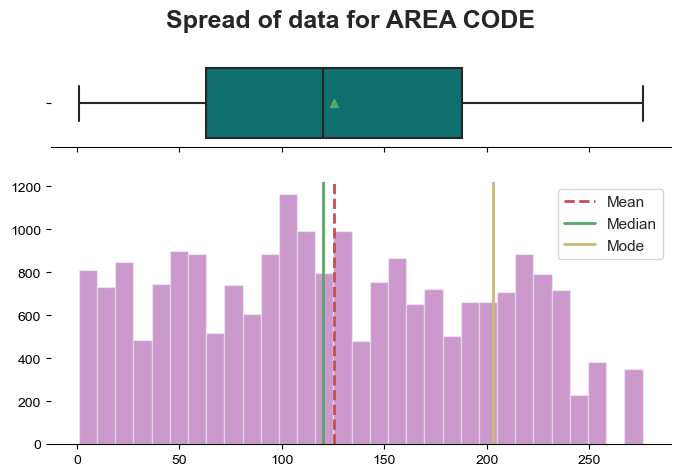

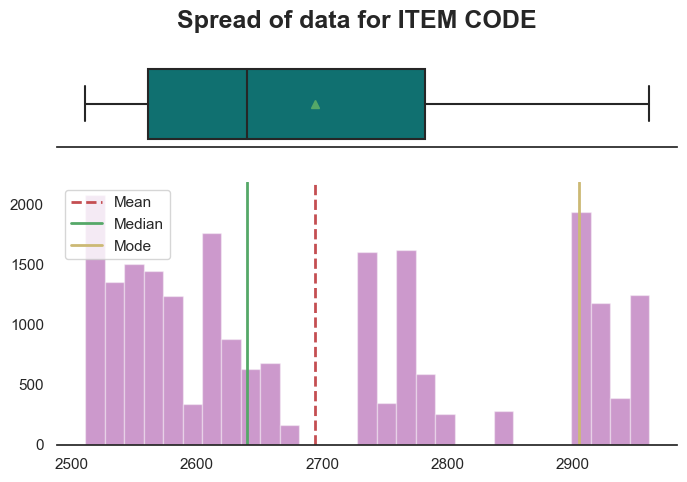

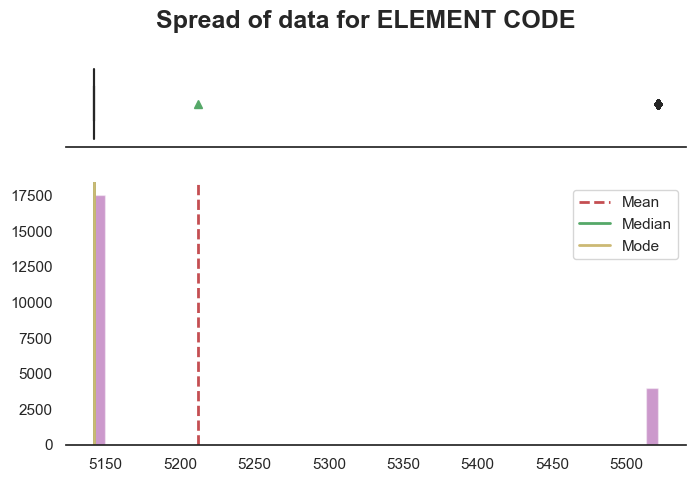

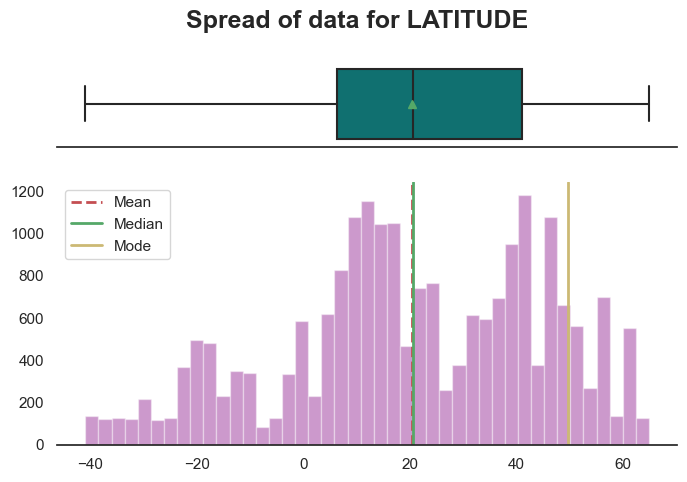

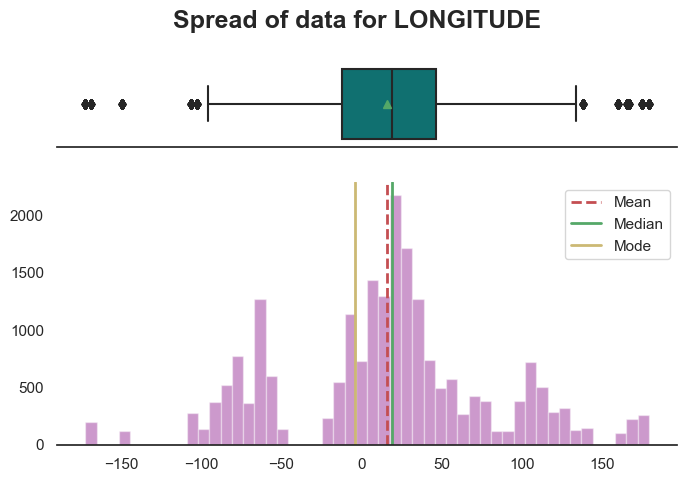

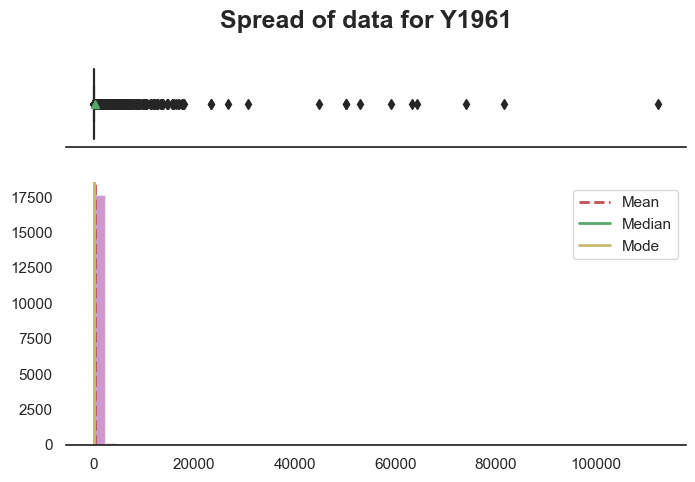

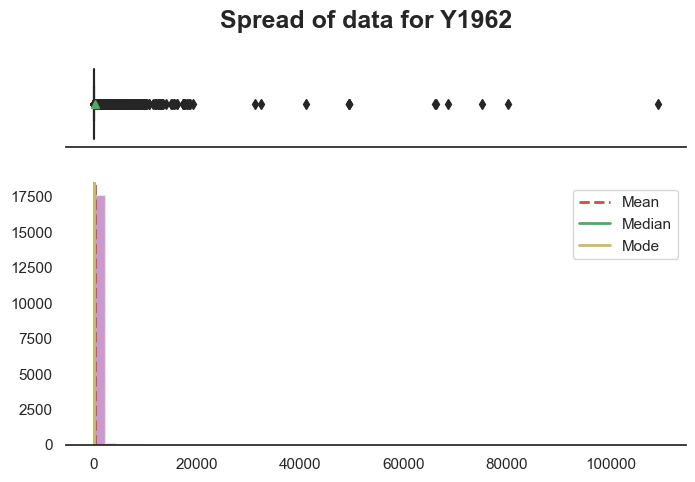

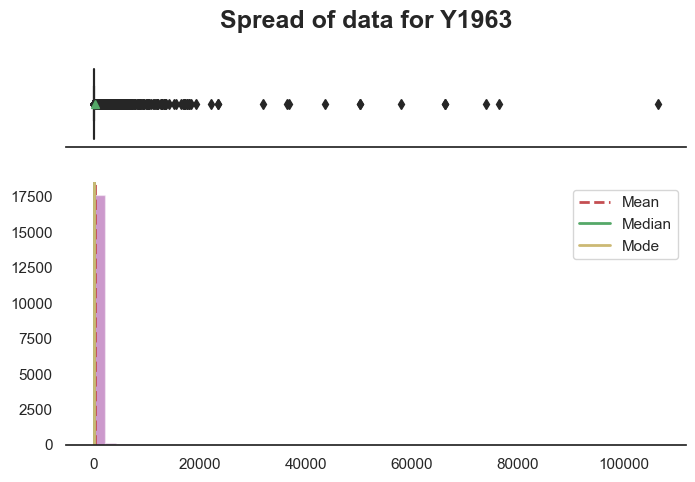

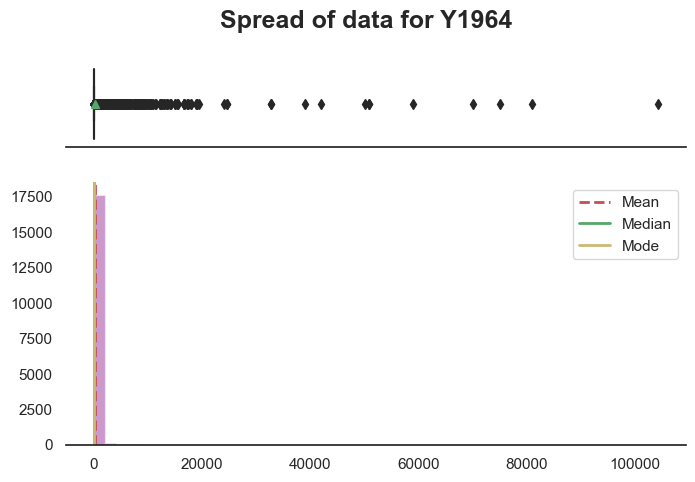

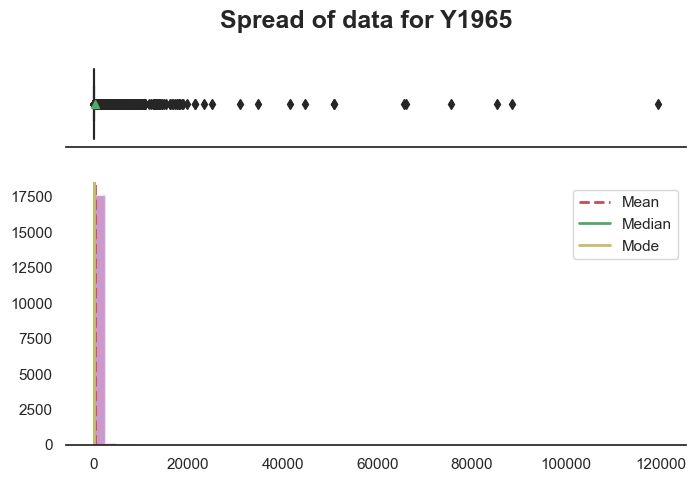

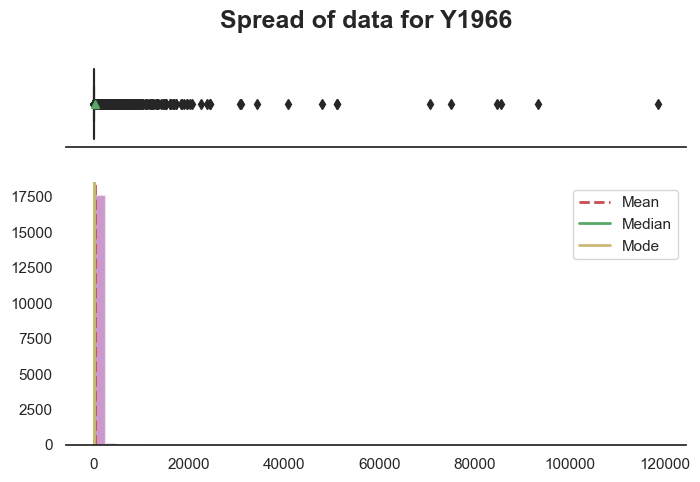

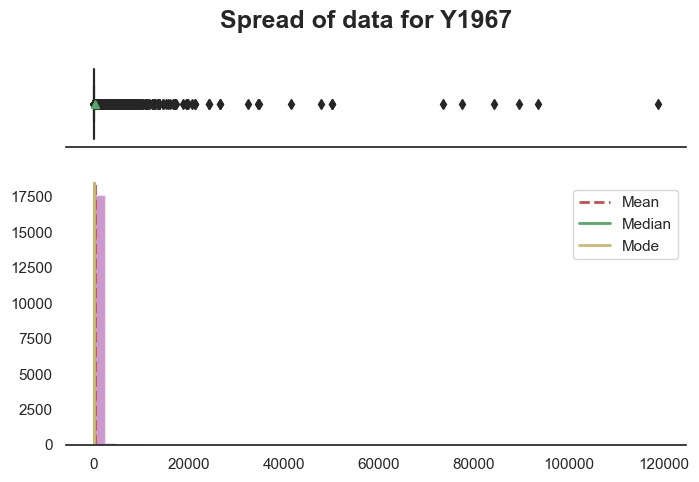

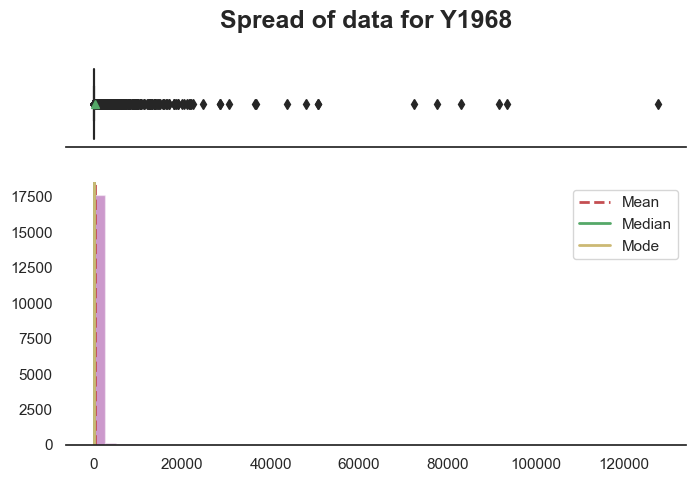

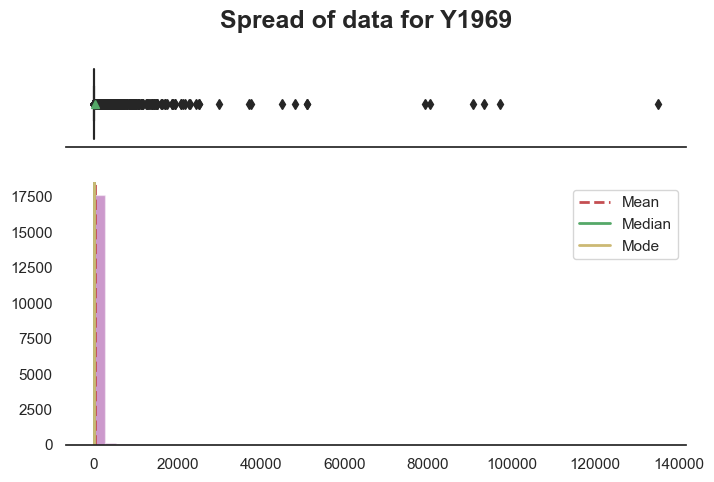

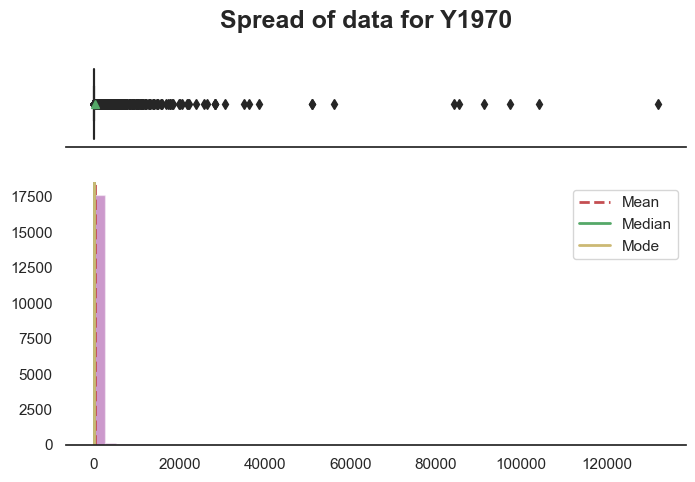

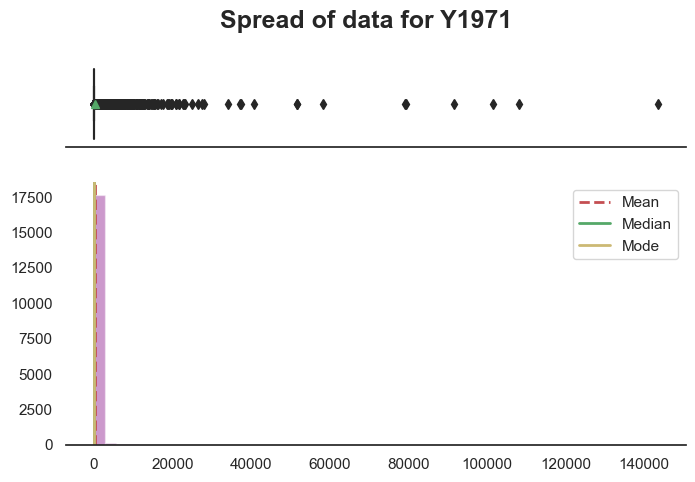

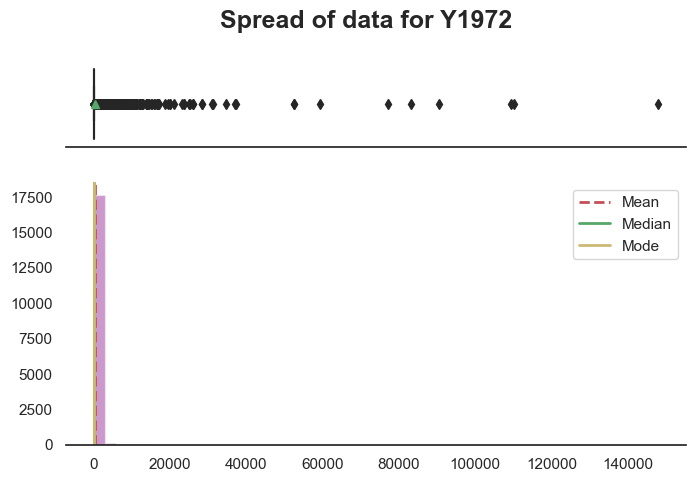

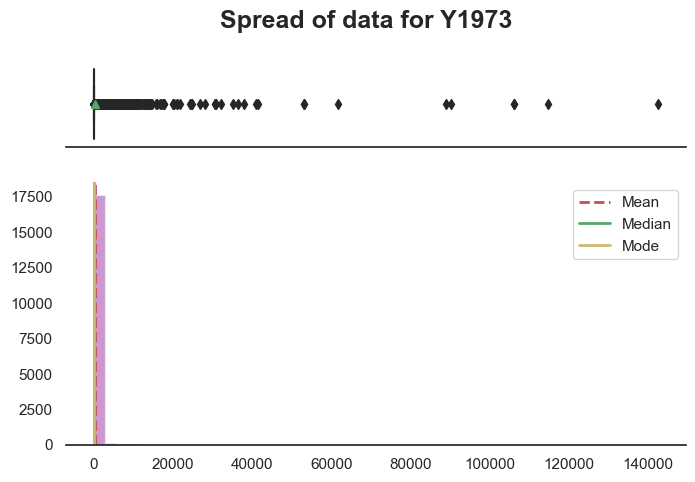

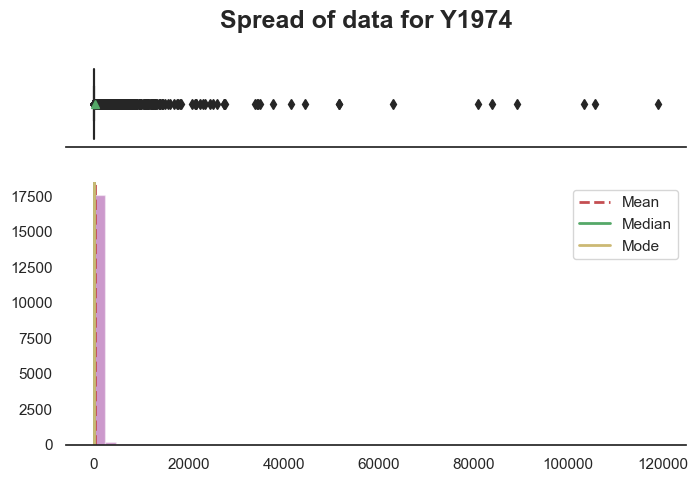

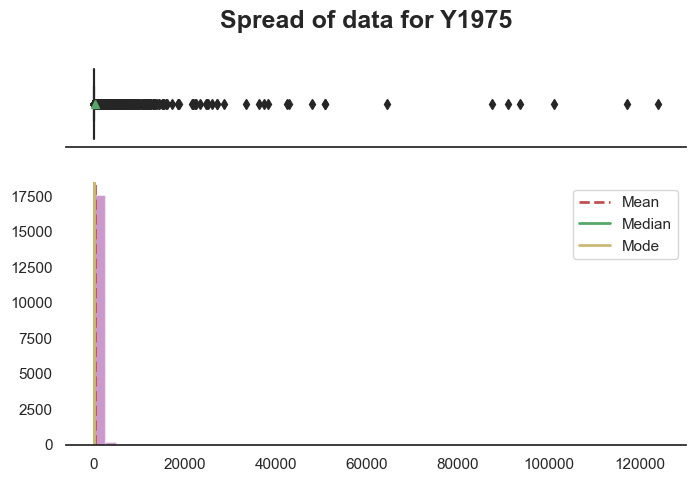

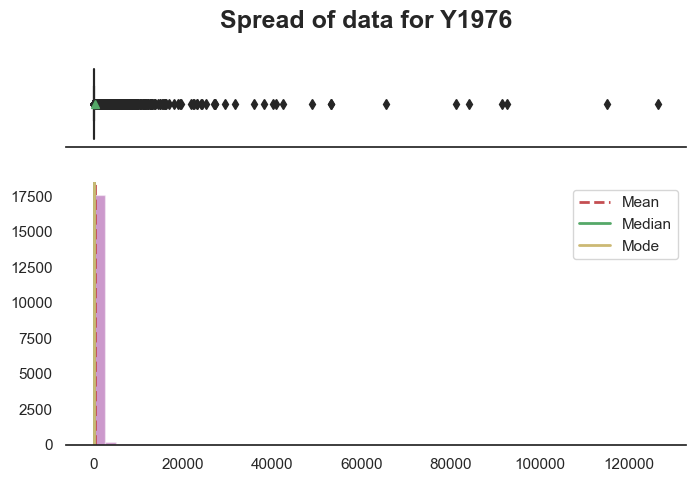

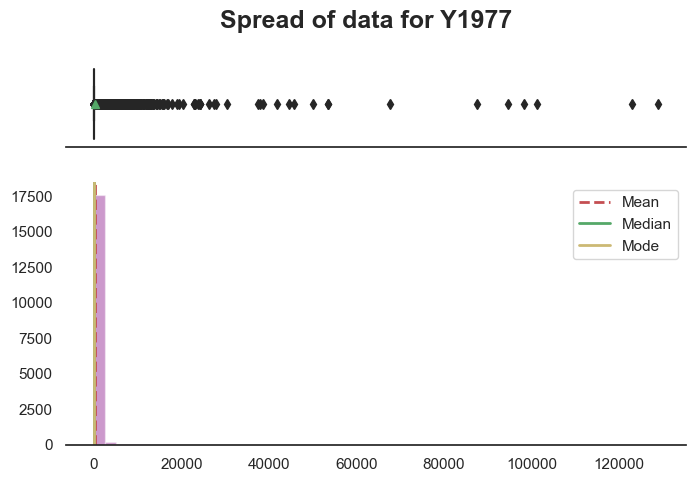

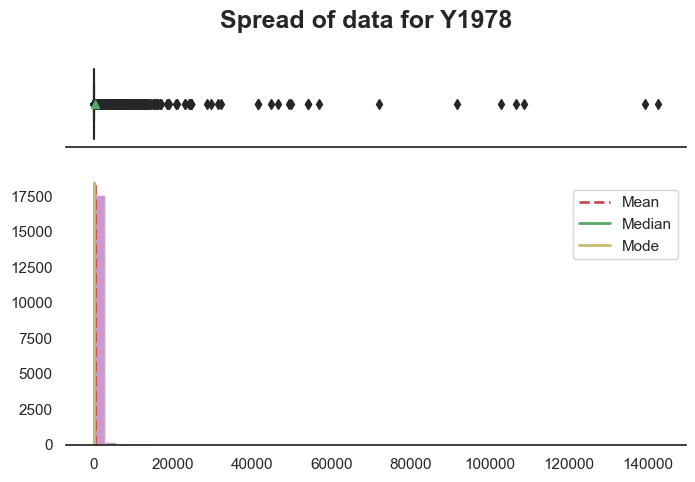

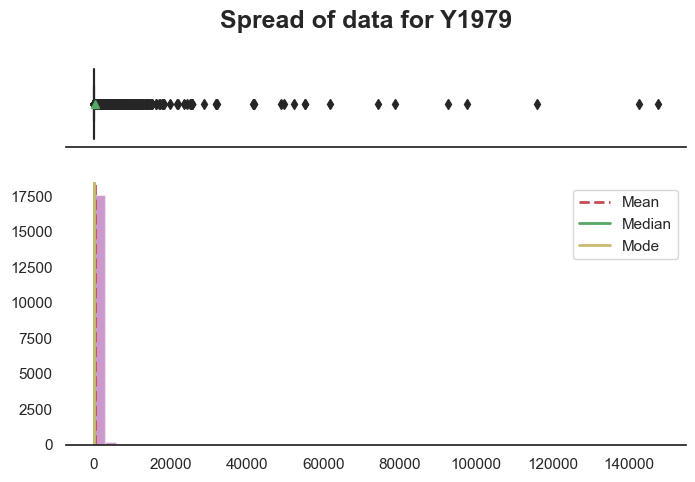

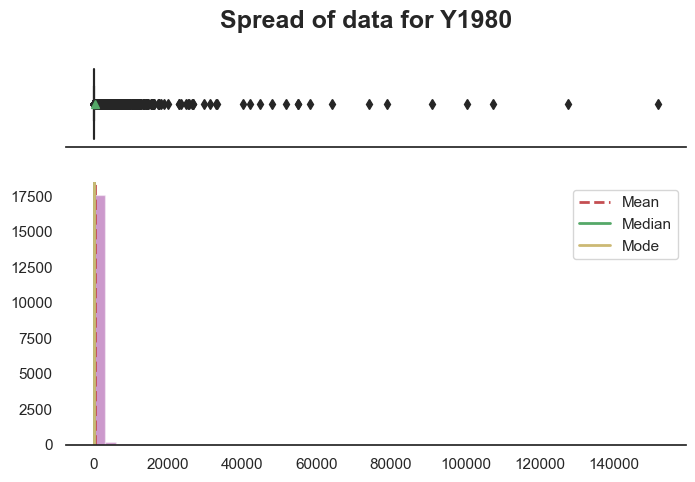

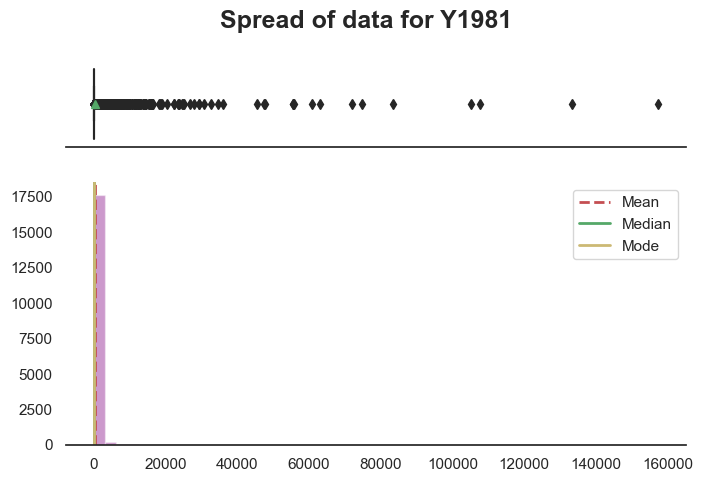

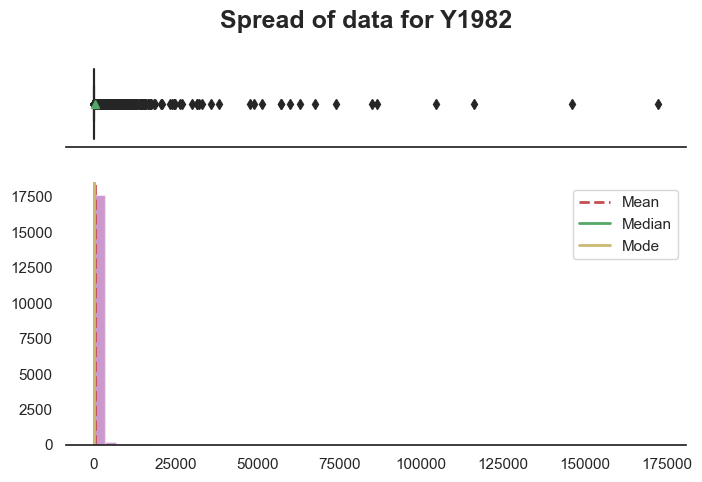

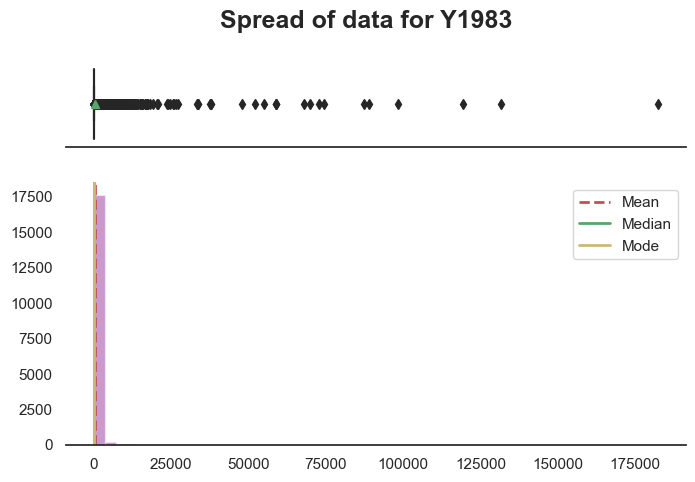

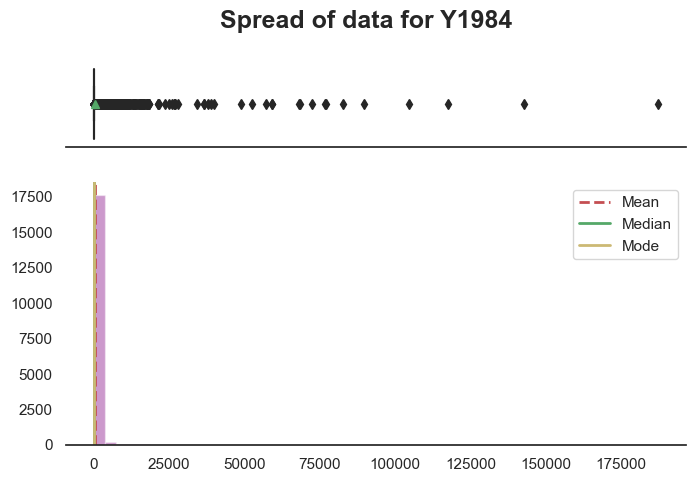

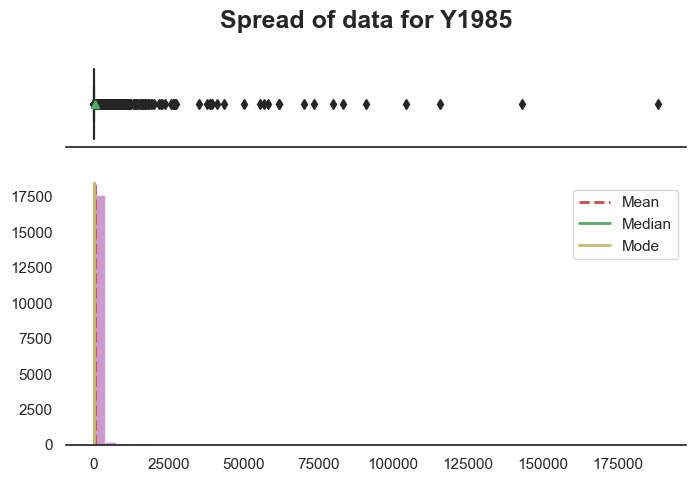

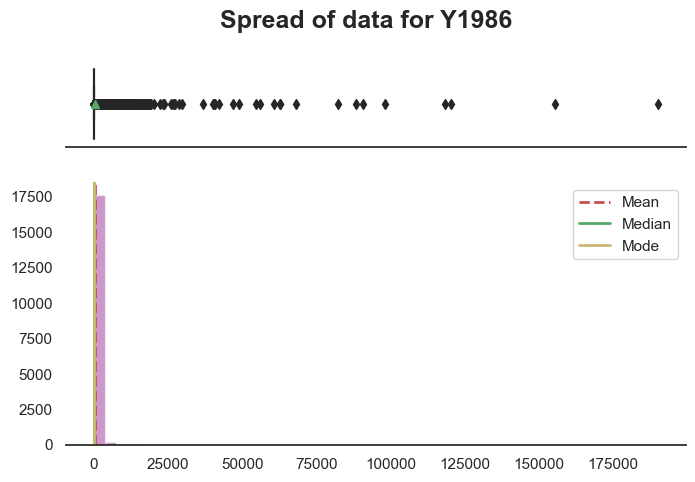

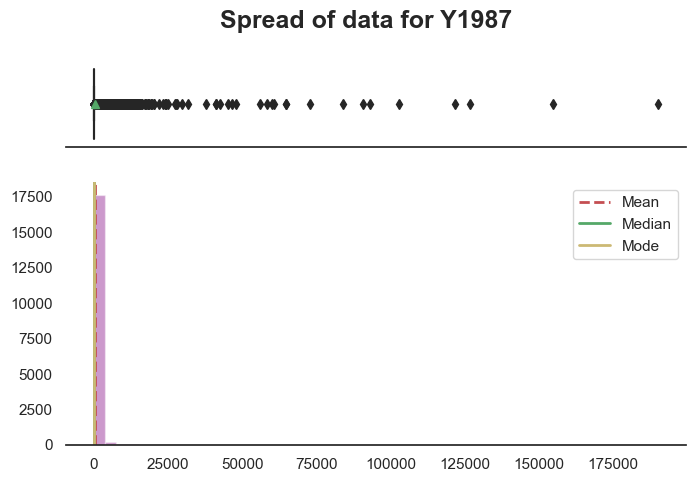

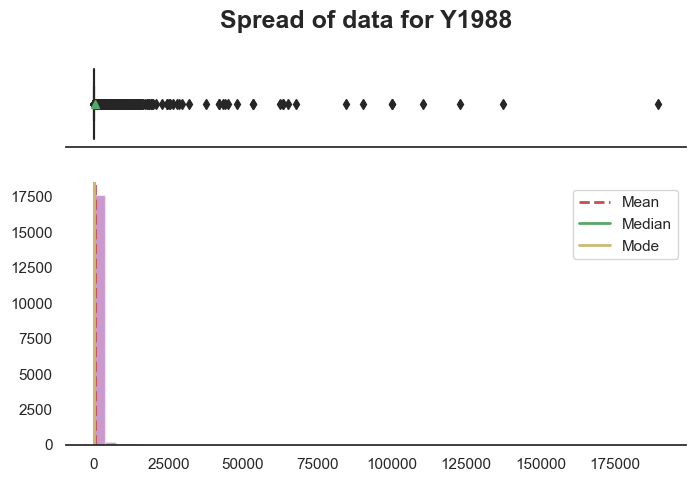

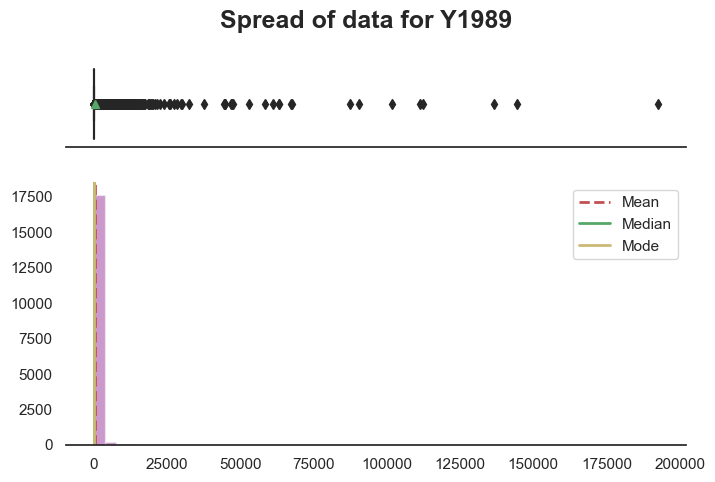

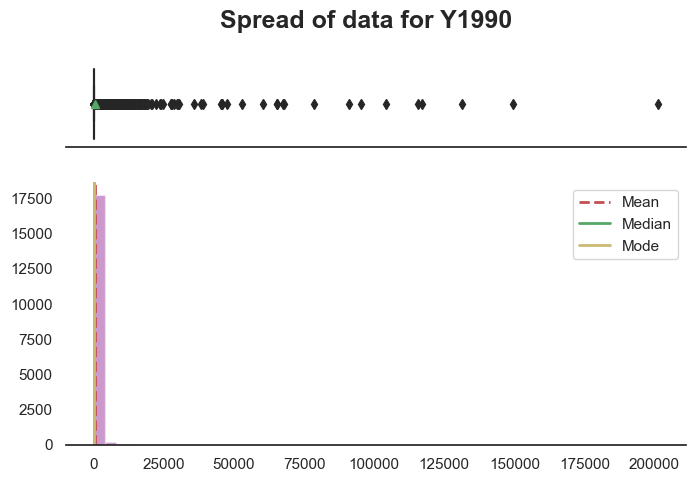

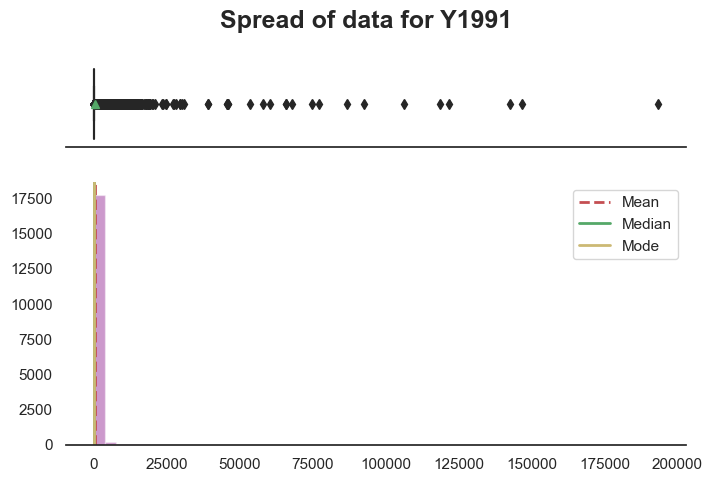

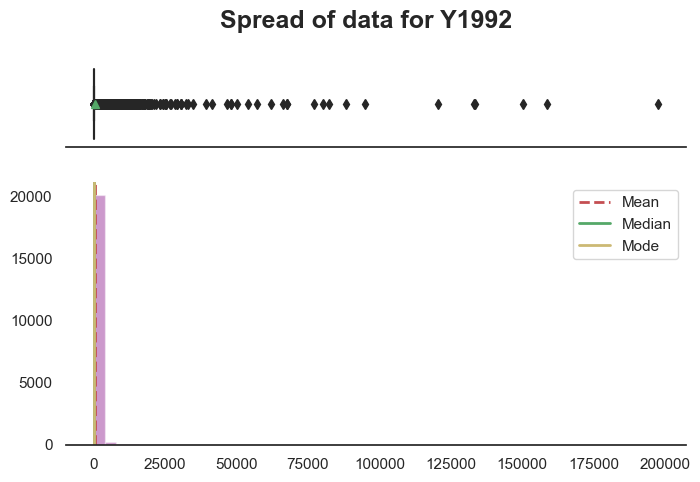

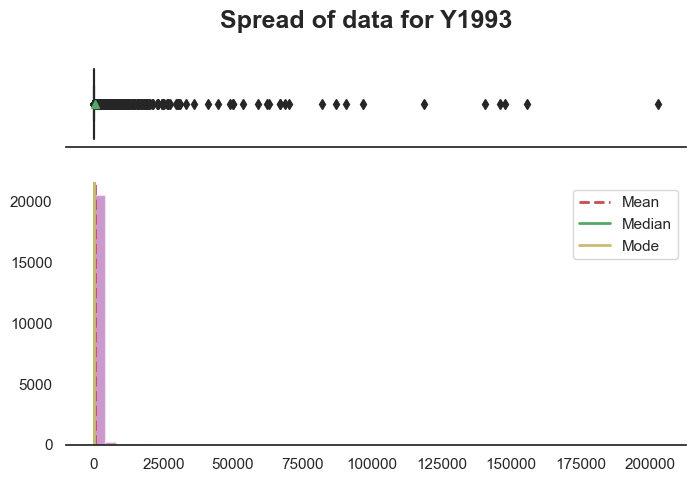

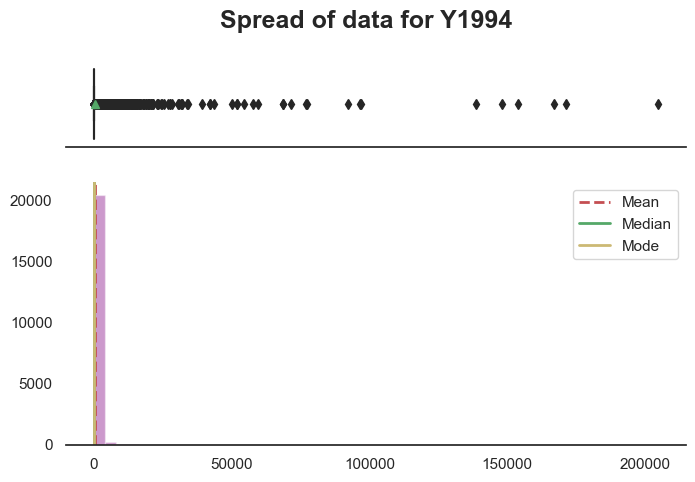

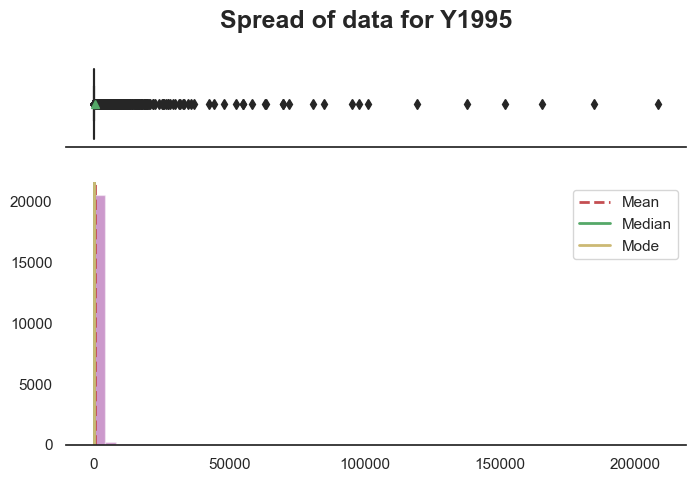

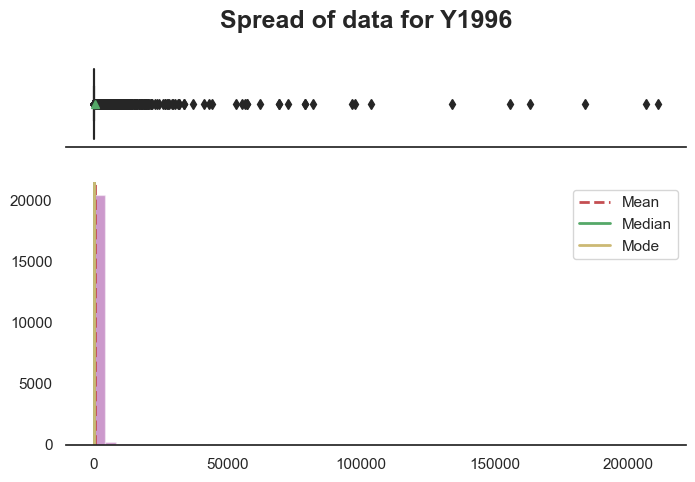

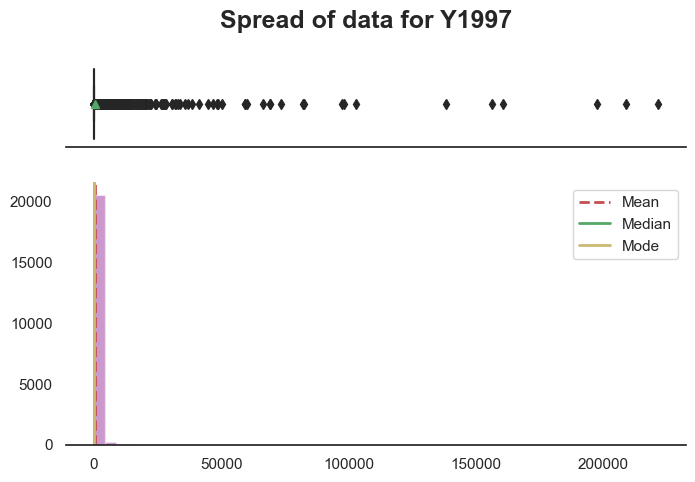

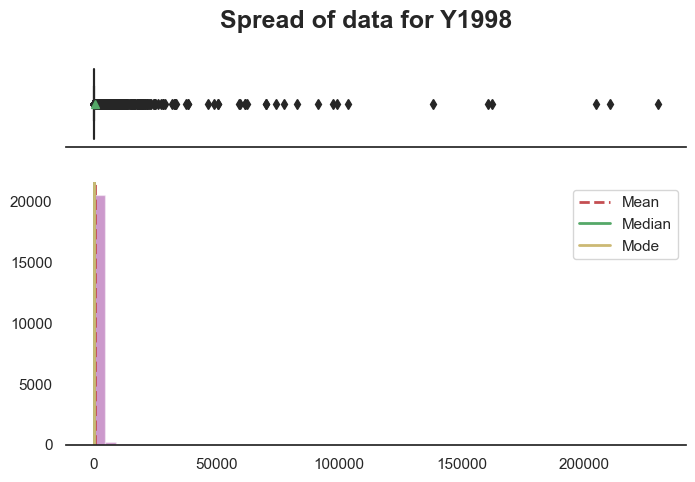

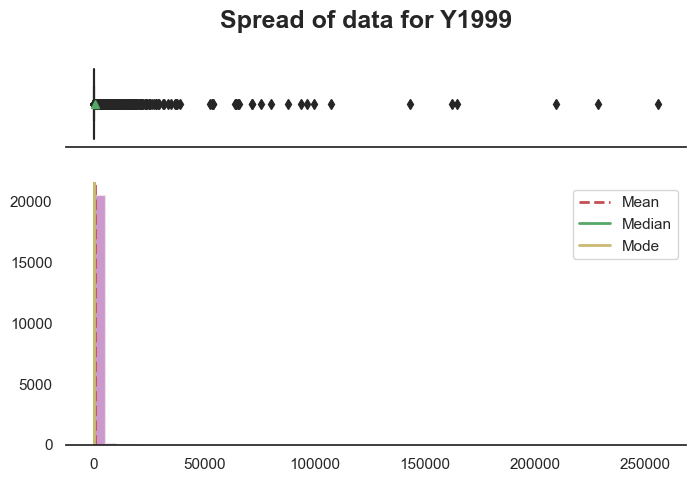

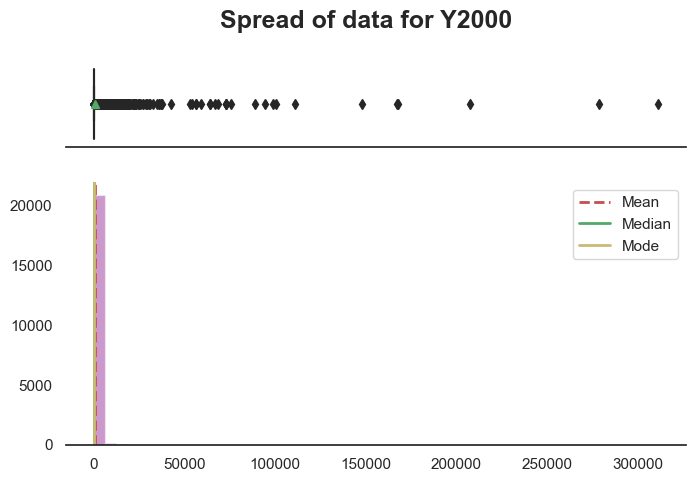

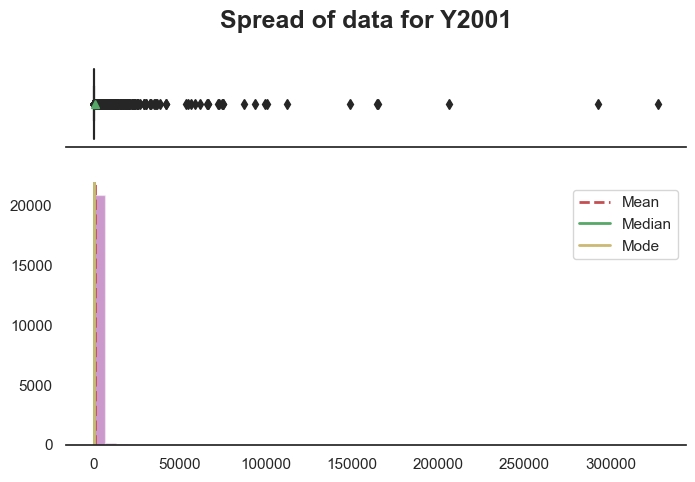

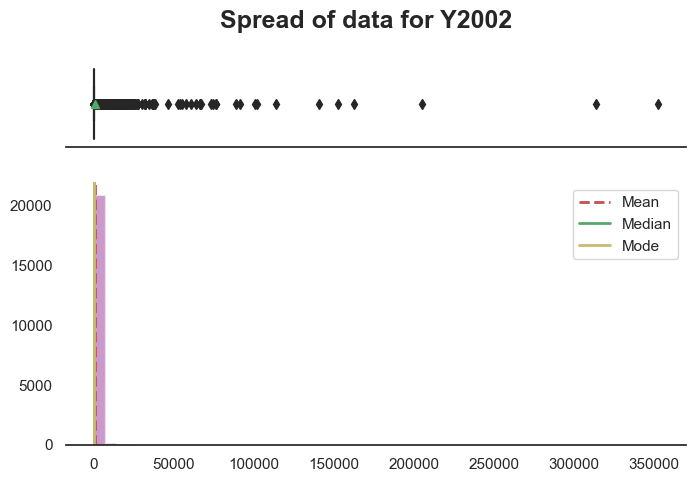

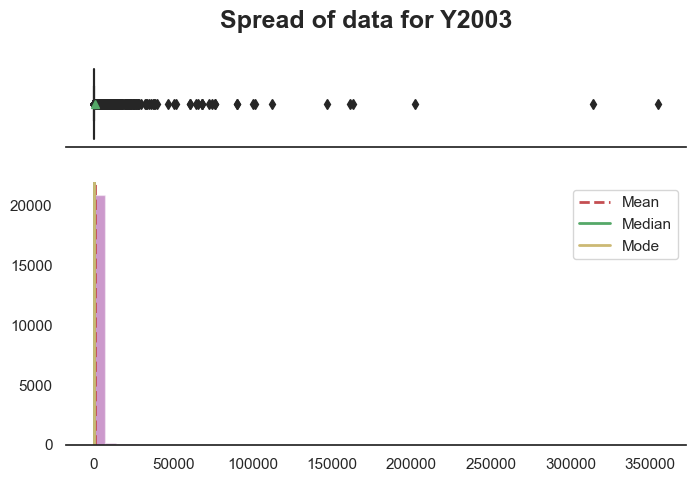

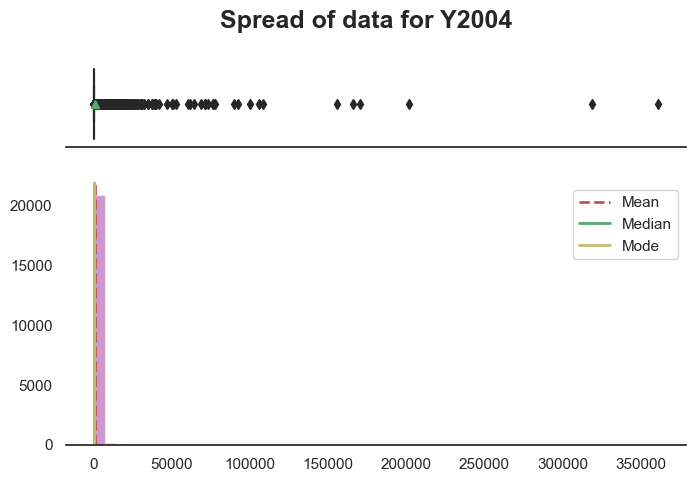

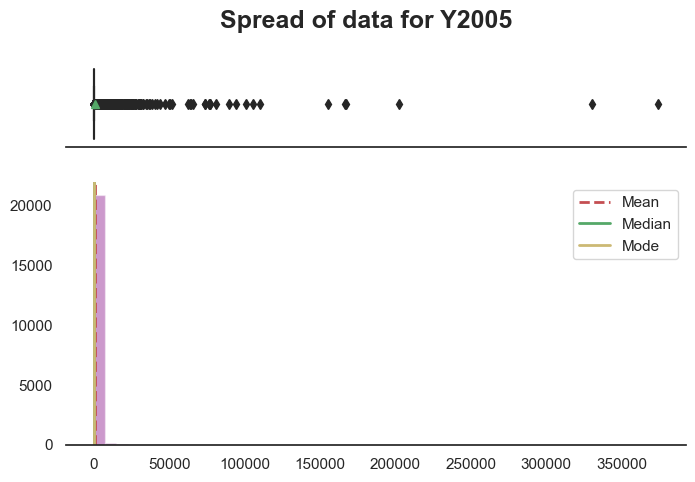

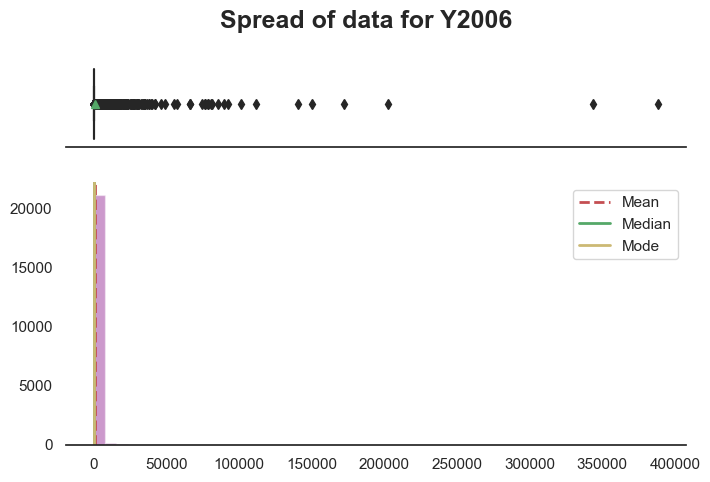

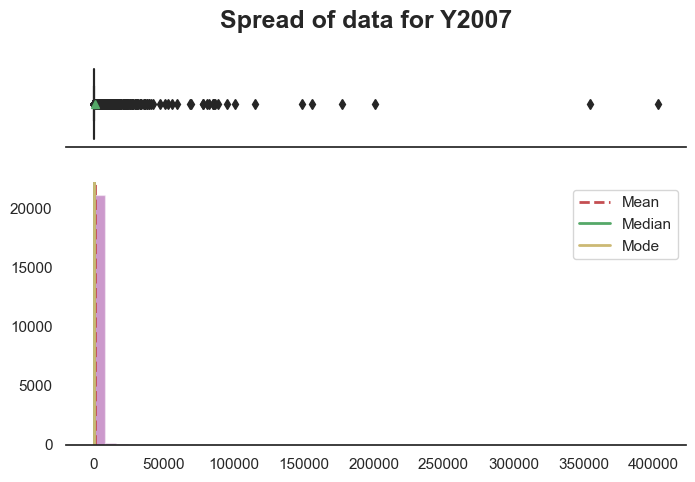

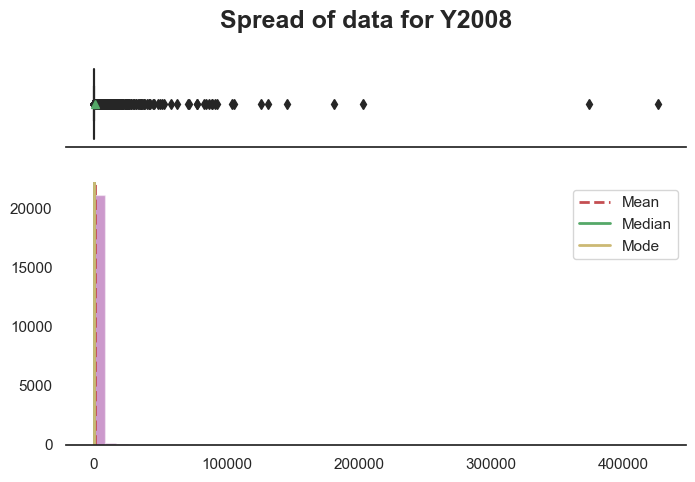

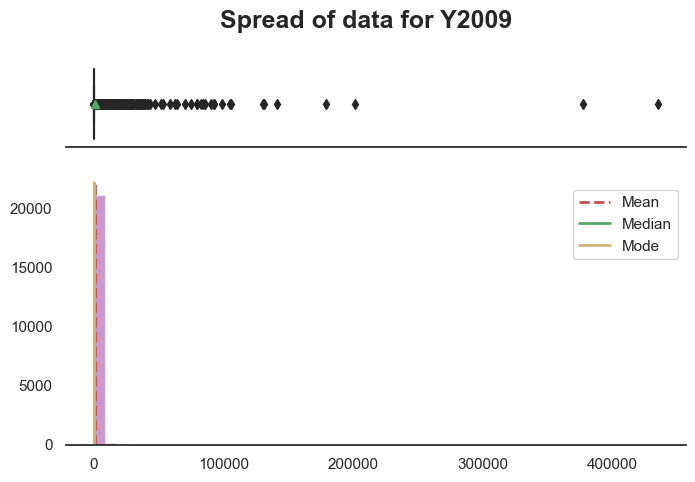

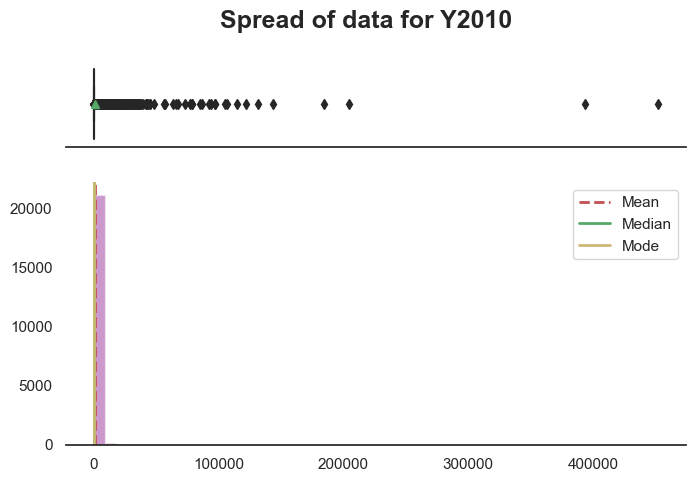

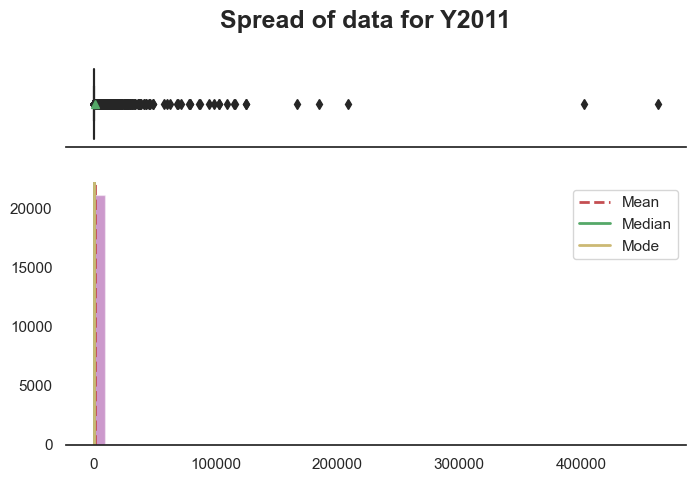

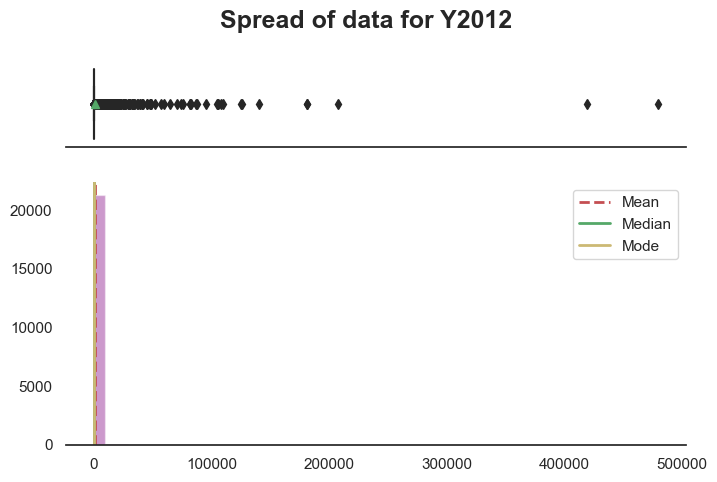

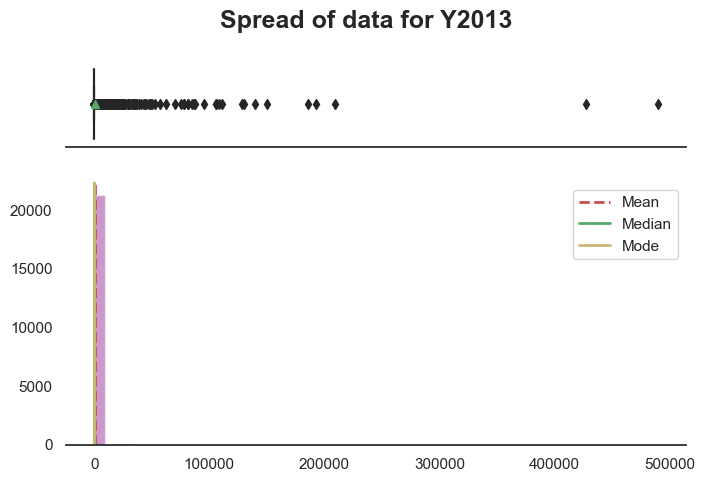

In [15]:
# slect all quantitative columns for checking the spread
list_col = df.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

### Plot for annual Produce of different countries with quantuty in y-axis and years in x-axis

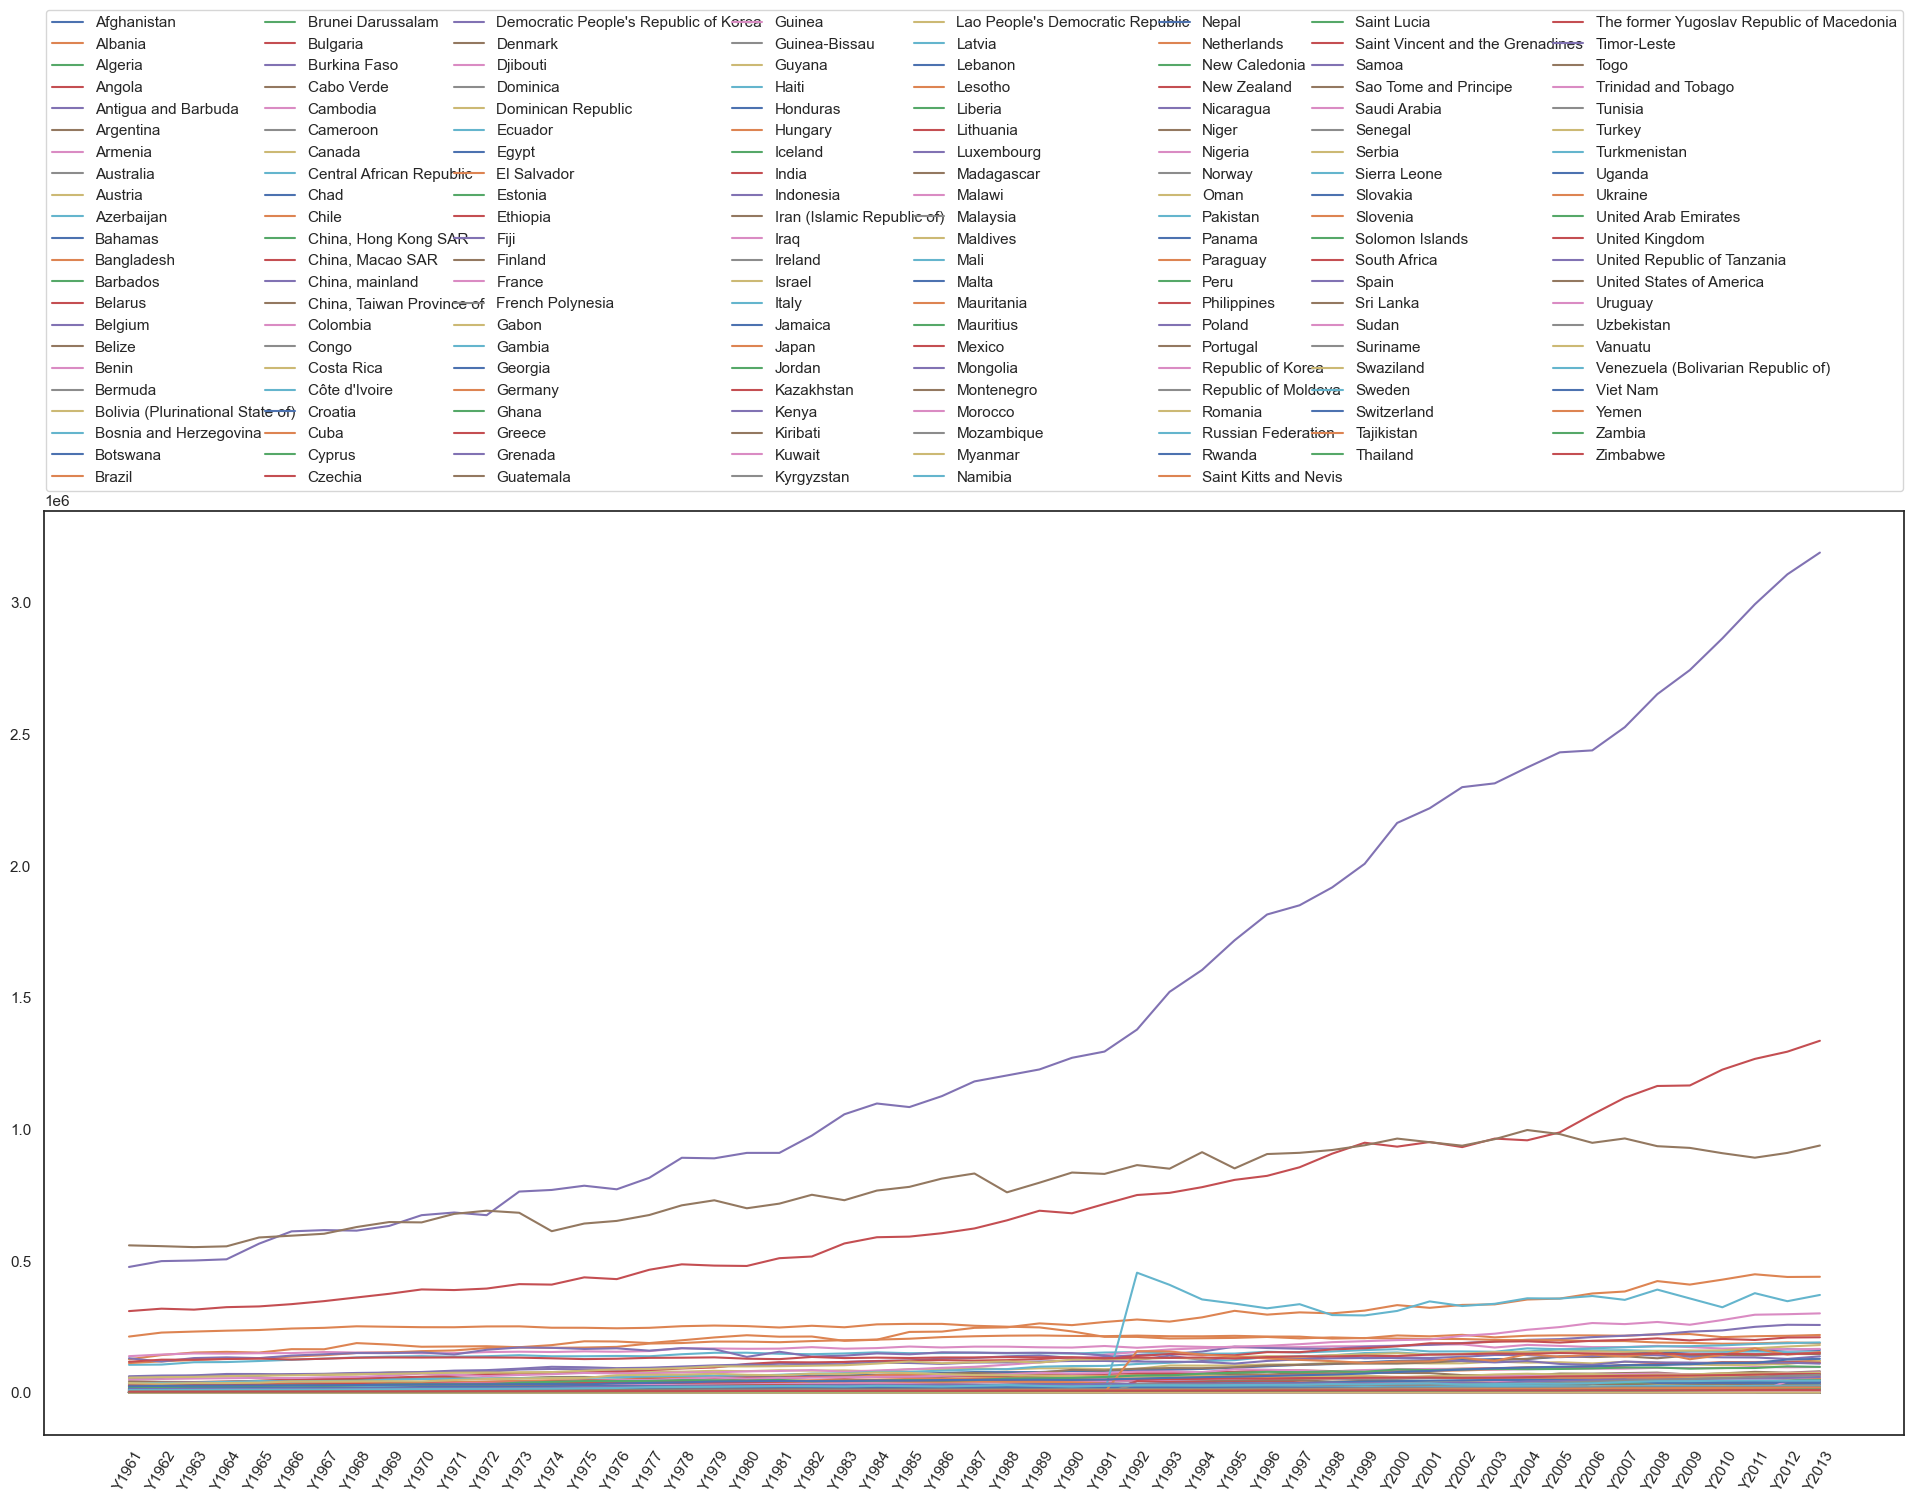

In [16]:
area_list = list(df['Area'].unique())
year_list = list(df.iloc[:,10:].columns)

plt.figure(figsize=(24,12))
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(df[yr][df['Area'] == ar].sum())
    plt.plot(yearly_produce, label=ar)
plt.xticks(np.arange(53), tuple(year_list), rotation=60)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=8, mode='expand', borderaxespad=0.1)
plt.savefig('p.png')
plt.show()

Clearly, china, India and US stand out here. So, these are the countries with most food and feed production

Now, let's have a close look at their food and feed data.

### Food and Feed plot for the whole dataset

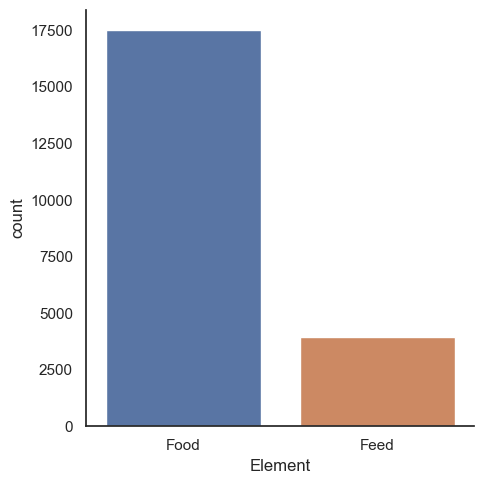

In [17]:
sns.factorplot('Element', data=df, kind='count')
plt.show()

So, there is a huge difference in food and feed production. Now, we have obvious assumprions about the following plots after looking at this huge differnce

### Food and Feed plot for the largest producers(India, USA, China)

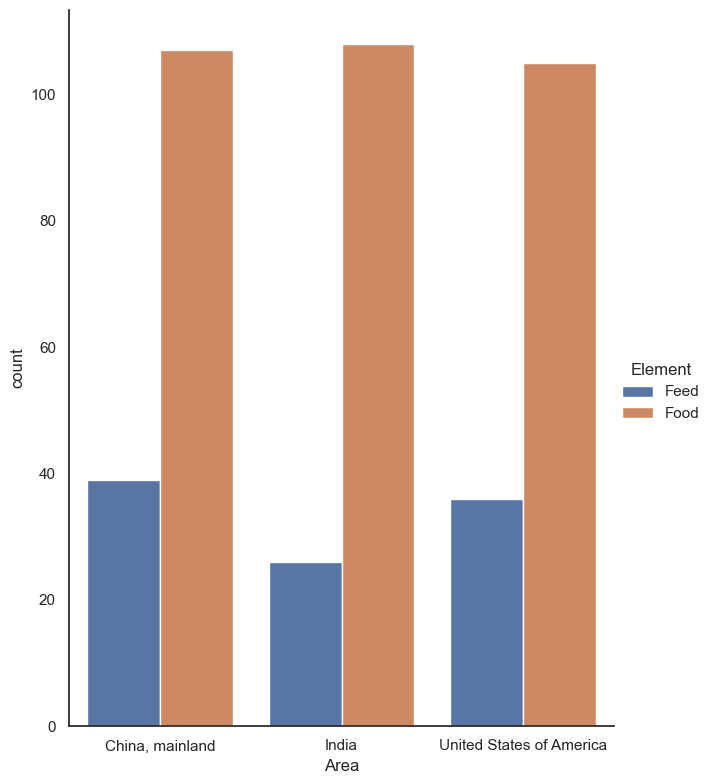

In [18]:
sns.factorplot('Area', data=df[(df['Area'] == 'India') | (df['Area'] == 'China, mainland') | 
                               (df['Area'] == 'United States of America')], kind='count', hue='Element', size=8, aspect=.8)

Though, there is a huge difference between feed and food production, these countries' total production and their ranks depend on feed production.

Now, we create a dataframe with countries as index and their annual produce as columns from 1961 to 2013.

In [19]:
new_df_dict = {}
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(df[yr][df['Area']==ar].sum())
    new_df_dict[ar] = yearly_produce
new_df = pd.DataFrame(new_df_dict)

new_df.head()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,9481.0,1706.0,7488.0,4834.0,92.0,43402.0,0.0,25795.0,22542.0,0.0,...,12367.0,559347.0,4631.0,0.0,97.0,9523.0,23856.0,2982.0,2976.0,3260.0
1,9414.0,1749.0,7235.0,4775.0,94.0,40784.0,0.0,27618.0,22627.0,0.0,...,12810.0,556319.0,4448.0,0.0,101.0,9369.0,25220.0,3038.0,3057.0,3503.0
2,9194.0,1767.0,6861.0,5240.0,105.0,40219.0,0.0,28902.0,23637.0,0.0,...,13109.0,552630.0,4682.0,0.0,103.0,9788.0,26053.0,3147.0,3069.0,3479.0
3,10170.0,1889.0,7255.0,5286.0,95.0,41638.0,0.0,29107.0,24099.0,0.0,...,12965.0,555677.0,4723.0,0.0,102.0,10539.0,26377.0,3224.0,3121.0,3738.0
4,10473.0,1884.0,7509.0,5527.0,84.0,44936.0,0.0,28961.0,22664.0,0.0,...,13742.0,589288.0,4581.0,0.0,107.0,10641.0,26961.0,3328.0,3236.0,3940.0


Now, this is not perfect so we transpose this dataframe and add column names.

In [20]:
new_df = pd.DataFrame.transpose(new_df)
new_df.columns = year_list

new_df.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0


- First, a new column which indicates mean produce of each state over the given years.
- Second, ranking column which ranks countries on the basis of mean produce.

In [21]:
mean_produce = []
for i in range(174):
    # 172 is no. of unique values in Area column
    mean_produce.append(new_df.iloc[i,:].values.mean())
# The iloc() function in python is defined in the Pandas module 
# that helps us to select a specific row or column from the data set.
new_df['Mean_Produce'] = mean_produce

new_df['Rank'] = new_df['Mean_Produce'].rank(ascending=False)

new_df.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean_Produce,Rank
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0,13003.056604,69.0
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0,4475.509434,104.0
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0,28879.490566,38.0
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0,13321.056604,68.0
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0,83.886792,172.0


Now, we create another dataframe with items and thier total production each year from 1961 to 2013

In [22]:
item_list = list(df['Item'].unique())

item_df = pd.DataFrame()
item_df['Item_Name'] = item_list

for yr in year_list:
    item_produce = []
    for it in item_list:
        item_produce.append(df[yr][df['Item'] == it].sum())
    item_df[yr] = item_produce
    

In [23]:
item_df.head()

,Item_Name,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Wheat and products,138829.0,144643.0,147325.0,156273.0,168822.0,169832.0,171469.0,179530.0,189658.0,...,527394.0,532263.0,537279.0,529271.0,562239.0,557245.0,549926.0,578179.0,576597,587492
1,Rice (Milled Equivalent),122700.0,131842.0,139507.0,148304.0,150056.0,155583.0,158587.0,164614.0,167922.0,...,361107.0,366025.0,372629.0,378698.0,389708.0,394221.0,398559.0,404152.0,406787,410880
2,Barley and products,46180.0,48915.0,51642.0,54184.0,54945.0,55463.0,56424.0,60455.0,65501.0,...,102055.0,97185.0,100981.0,93310.0,98209.0,99135.0,92563.0,92570.0,88766,99452
3,Maize and products,168039.0,168305.0,172905.0,175468.0,190304.0,200860.0,213050.0,215613.0,221953.0,...,545024.0,549036.0,543280.0,573892.0,592231.0,557940.0,584337.0,603297.0,608730,671300
4,Millet and products,19075.0,19019.0,19740.0,20353.0,18377.0,20860.0,22997.0,21785.0,23966.0,...,25789.0,25496.0,25997.0,26750.0,26373.0,24575.0,27039.0,25740.0,26105,26346


### Some more Feature engineering 

This time, we will use the bew features to get some good conclusions

1. Total Amount of item produced from 1961 to 2013.
2. Providing a rank to the items to know the most produced item.

In [24]:
sum_col = []
for i in range(115):
    sum_col.append(item_df.iloc[i,1:].values.sum())
item_df['Sum'] = sum_col
item_df['Production_Rank'] = item_df['Sum'].rank(ascending=False)

item_df.head(58)

,Item_Name,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Sum,Production_Rank
0,Wheat and products,138829.0,144643.0,147325.0,156273.0,168822.0,169832.0,171469.0,179530.0,189658.0,...,537279.0,529271.0,562239.0,557245.0,549926.0,578179.0,576597,587492,19194671.0,6.0
1,Rice (Milled Equivalent),122700.0,131842.0,139507.0,148304.0,150056.0,155583.0,158587.0,164614.0,167922.0,...,372629.0,378698.0,389708.0,394221.0,398559.0,404152.0,406787,410880,14475448.0,8.0
2,Barley and products,46180.0,48915.0,51642.0,54184.0,54945.0,55463.0,56424.0,60455.0,65501.0,...,100981.0,93310.0,98209.0,99135.0,92563.0,92570.0,88766,99452,4442742.0,20.0
3,Maize and products,168039.0,168305.0,172905.0,175468.0,190304.0,200860.0,213050.0,215613.0,221953.0,...,543280.0,573892.0,592231.0,557940.0,584337.0,603297.0,608730,671300,19960640.0,5.0
4,Millet and products,19075.0,19019.0,19740.0,20353.0,18377.0,20860.0,22997.0,21785.0,23966.0,...,25997.0,26750.0,26373.0,24575.0,27039.0,25740.0,26105,26346,1225400.0,38.0
5,"Cereals, Other",7128.0,7946.0,7821.0,7958.0,8121.0,8001.0,7823.0,7811.0,8022.0,...,21246.0,22632.0,23461.0,24344.0,22176.0,23664.0,24489,24359,725368.0,49.0
6,Potatoes and products,129648.0,125766.0,133709.0,133686.0,131968.0,137447.0,138913.0,142170.0,137107.0,...,236067.0,245490.0,251263.0,250453.0,261658.0,280960.0,285068,286350,9545562.0,10.0
7,Sugar cane,27544.0,29953.0,31218.0,30829.0,27664.0,34009.0,26314.0,36767.0,34820.0,...,44813.0,53123.0,60469.0,59562.0,55100.0,63209.0,59241,59529,2194302.0,32.0
8,Sugar beet,1034.0,1164.0,1299.0,1101.0,1318.0,1213.0,1503.0,1493.0,1343.0,...,14455.0,10089.0,8886.0,7044.0,10444.0,16539.0,15245,12451,246095.0,80.0
9,Sugar (Raw Equivalent),39977.0,41711.0,42235.0,43790.0,45914.0,47636.0,49493.0,50797.0,53562.0,...,128076.0,129590.0,133161.0,132589.0,132952.0,136674.0,141045,143738,4708762.0,17.0


#### Now, we find the most produced food items in the last half-century 

In [25]:
item_df['Item_Name'][item_df['Production_Rank']< 11.0].sort_values()

56    Cereals - Excluding Beer
65     Fruits - Excluding Wine
3           Maize and products
53     Milk - Excluding Butter
6        Potatoes and products
1     Rice (Milled Equivalent)
57               Starchy Roots
64                  Vegetables
27           Vegetables, Other
0           Wheat and products
Name: Item_Name, dtype: object

So, cereals, fruits and maize are the most produced items in the last 50 years.

### Food and Feed plot fo most  produced itmes `

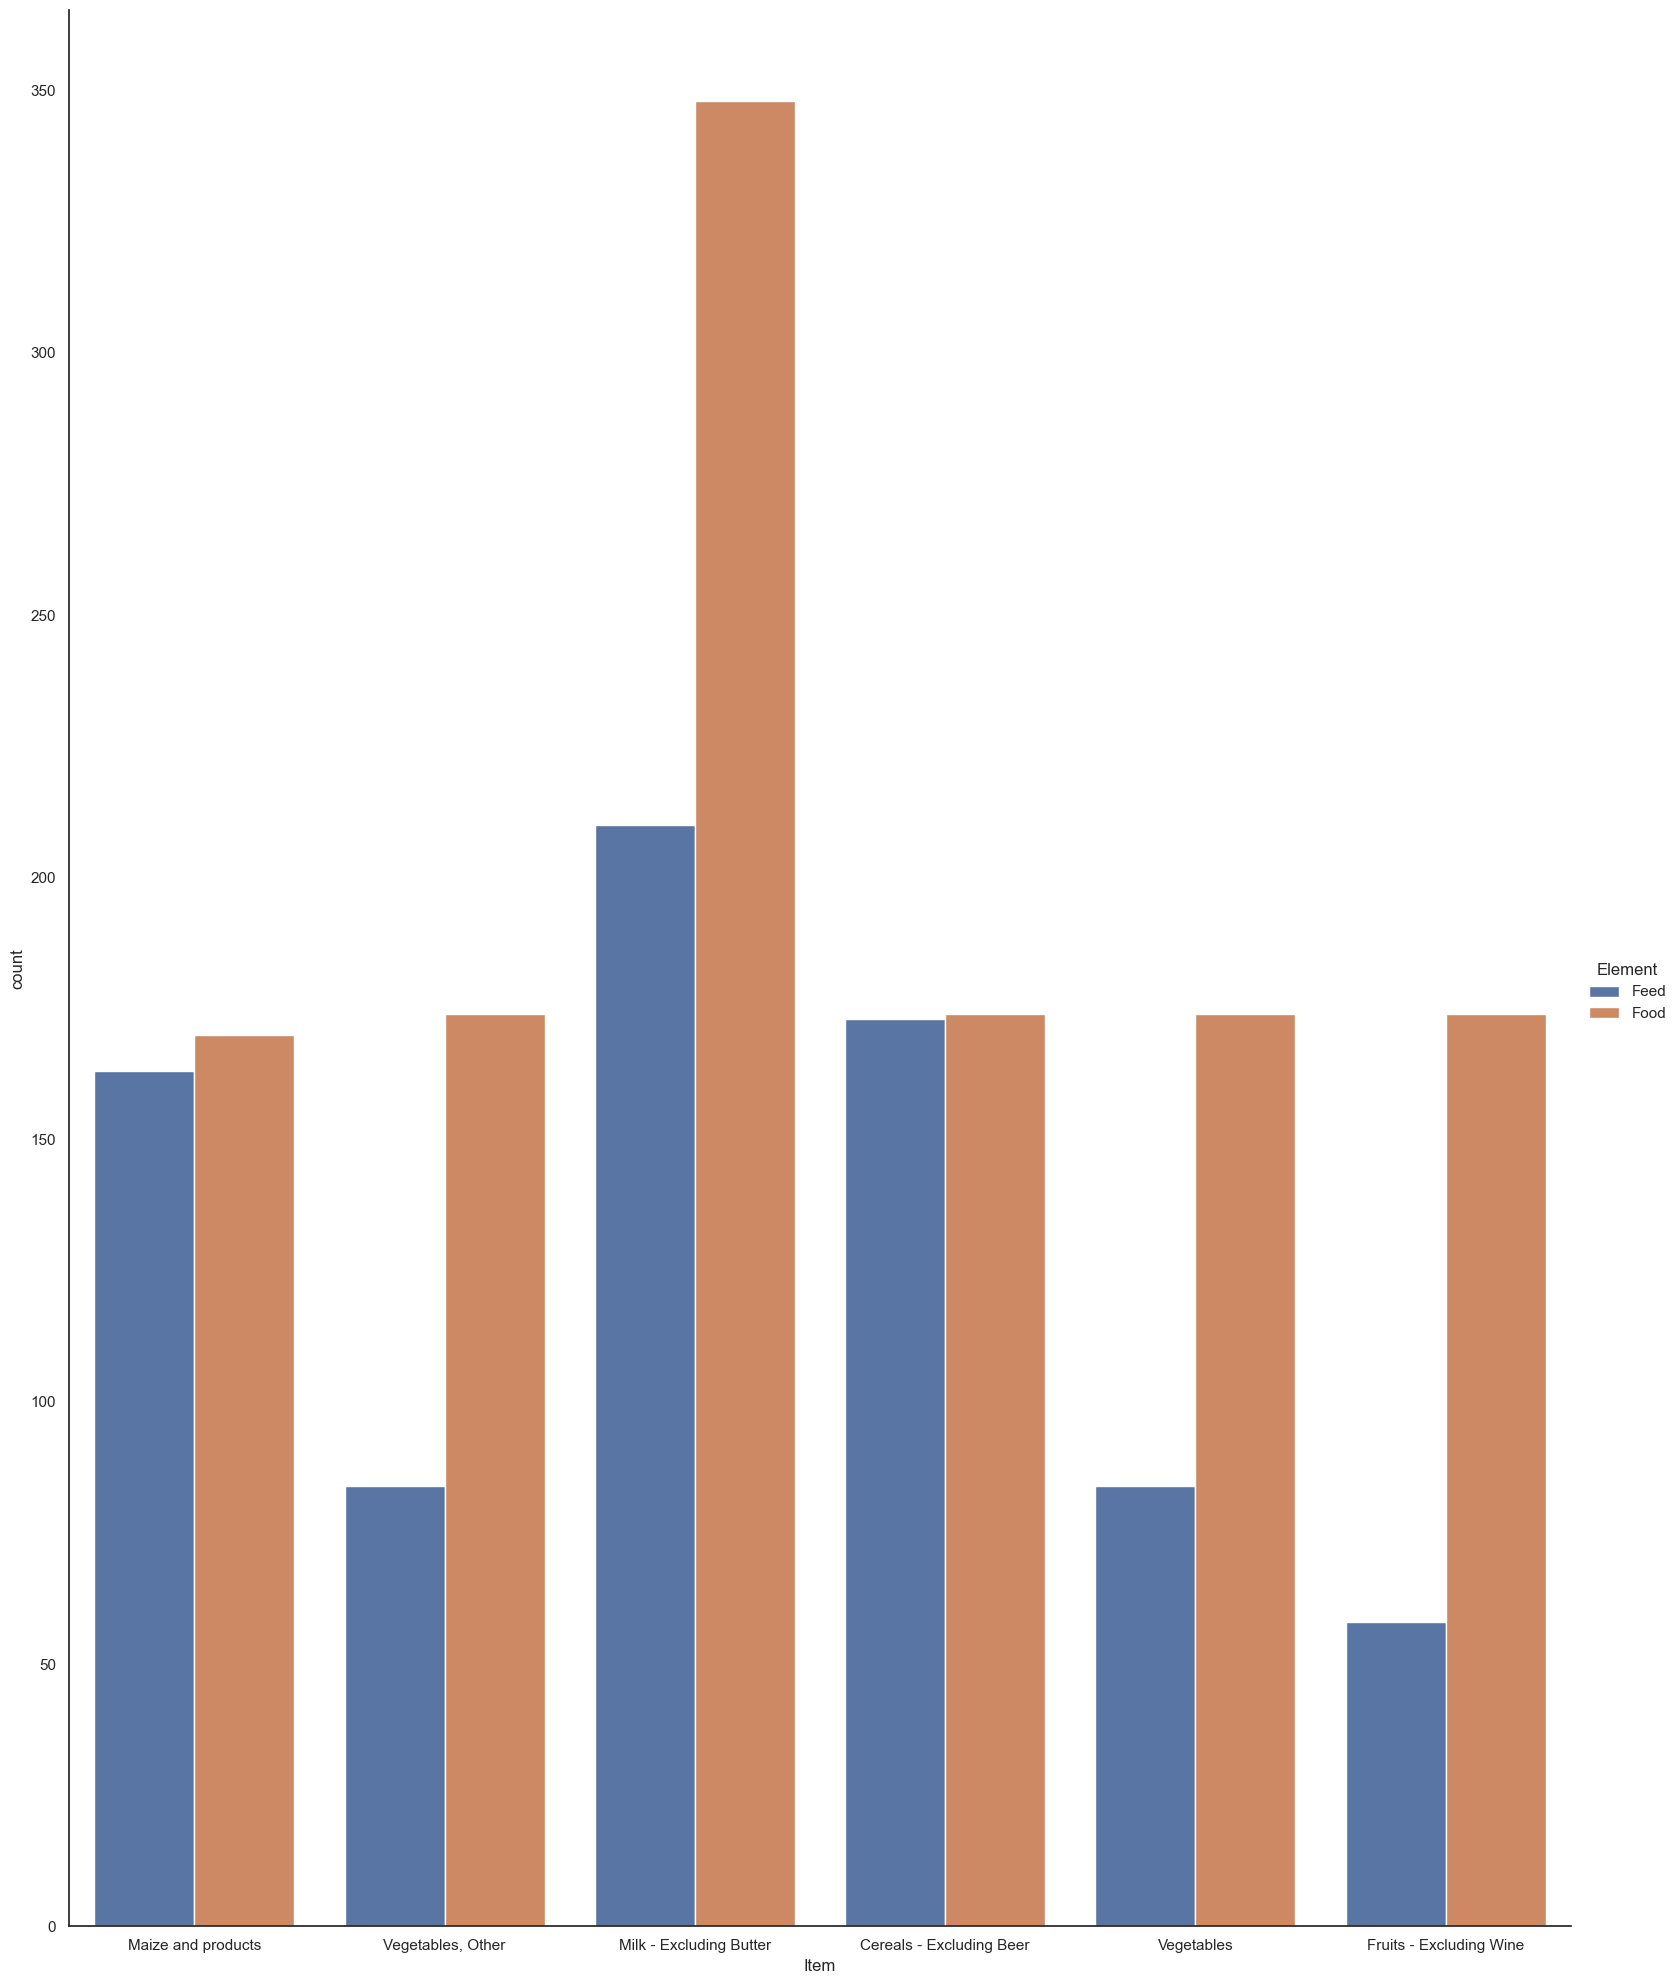

In [26]:
sns.factorplot('Item', data=df[(df['Item'] == 'wheat and products') | (df['Item'] == 'Rice Milled Equivalent')
                                | (df['Item'] == 'Maize and products') | (df['Item'] == ' Potatoes and products') 
                                | (df['Item'] == 'Vegetables, Other') | (df['Item'] == 'Milk - Excluding Butter')
                                | (df['Item'] == 'Cereals - Excluding Beer') | (df['Item'] == 'Cereals - Excluding Beer')
                                | (df['Item'] == 'Vegetables') | (df['Item'] == 'Fruits - Excluding Wine')], hue='Element',
                                                                               kind='count', size=20, aspect=.8)

### Now, we plot a heatmap of correlation of produce in difference years

<AxesSubplot:>

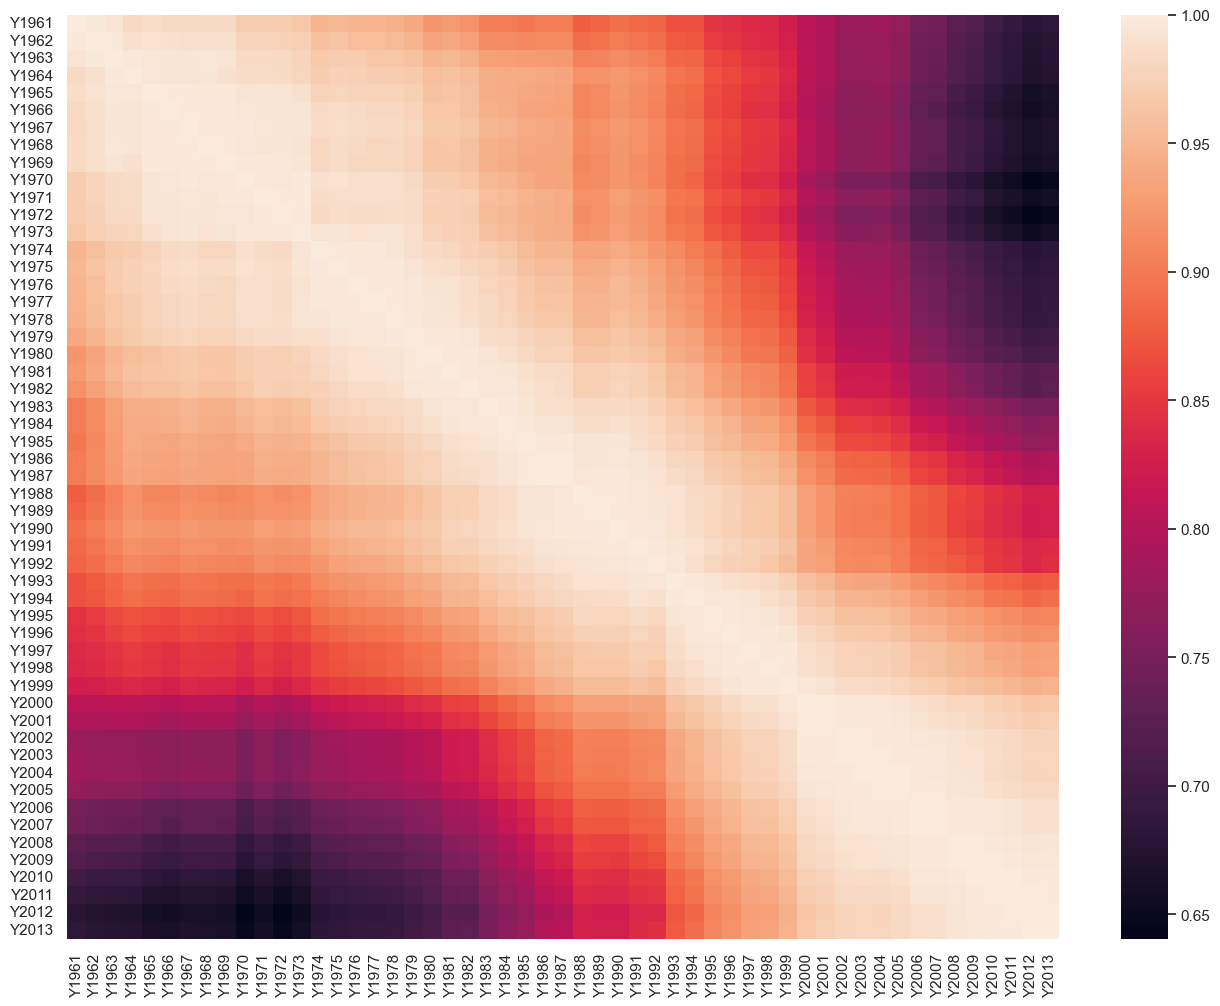

In [27]:
year_df = df.iloc[:,10:]
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(year_df.corr(), ax=ax)

### Heatmap of Production of food items over years

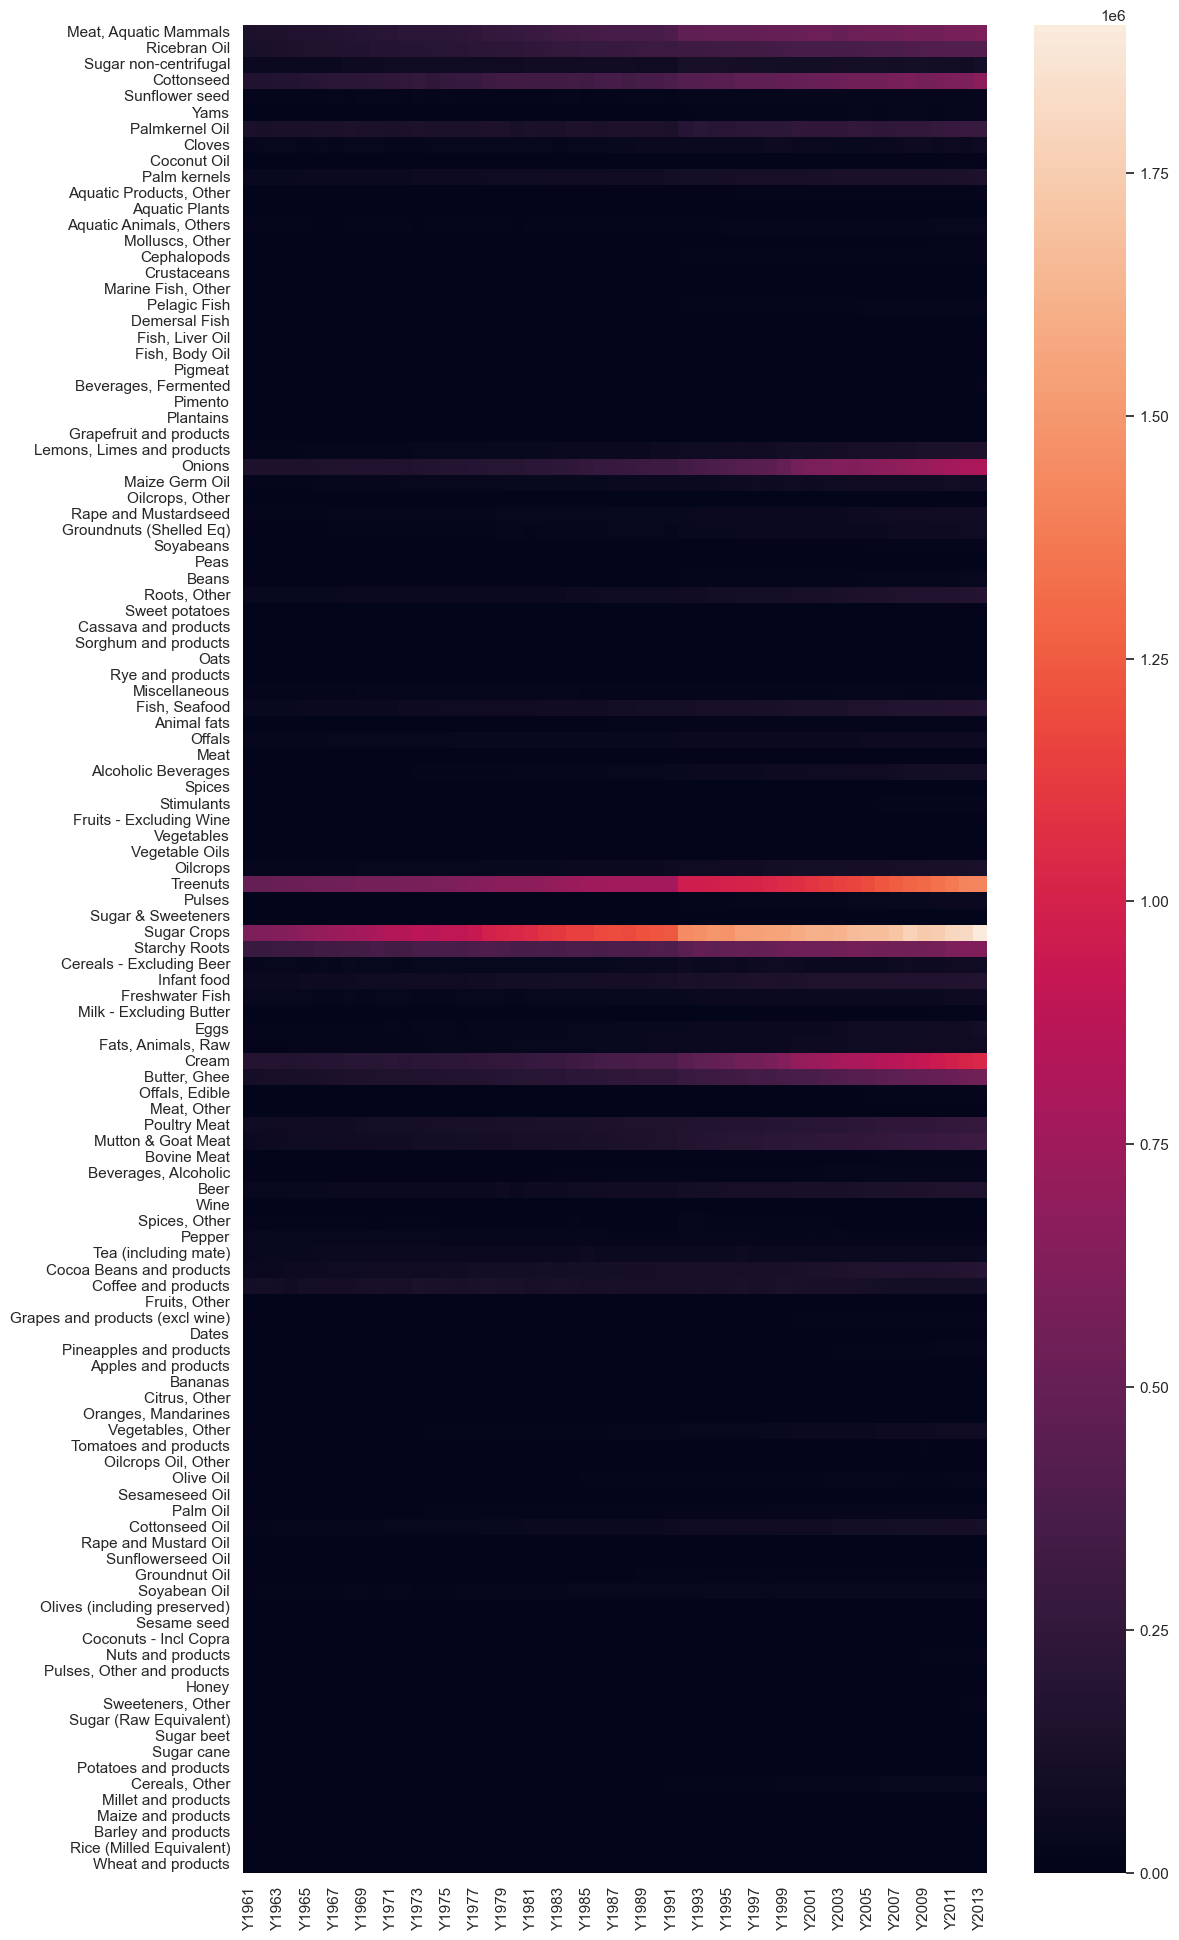

In [29]:
new_item_df = item_df.drop(["Item_Name","Sum","Production_Rank"], axis = 1)
fig, ax = plt.subplots(figsize=(12,24))
sns.heatmap(new_item_df,ax=ax)
ax.set_yticklabels(item_df.Item_Name.values[::-1])
plt.show()

Observations:

- Treenuts sales are high after 1993
- Sugar crops sales incrrease after 1971
- Cream sales increase rapidly after 1993
- Oninons sale start to slighlty increase from 1979 and there is no rapid increase but only a slow increase in sales.

### K-means clustering

In [30]:
new_df.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean_Produce,Rank
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0,13003.056604,69.0
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0,4475.509434,104.0
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0,28879.490566,38.0
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0,13321.056604,68.0
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0,83.886792,172.0


In [31]:
X = new_df.iloc[:,:-2].values

X = pd.DataFrame(X)
X = X._convert(numeric=True)
X.columns = year_list

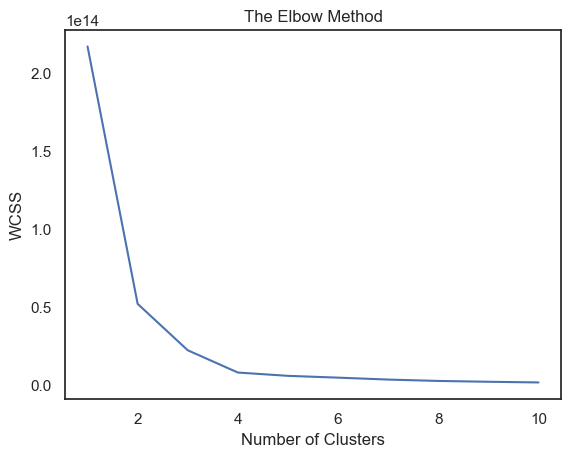

In [32]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

As the elbow corner coincides with x=2, we will have to form **2 clusters**.


In [40]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.to_numpy()

In [41]:
X

array([[ 9481.,  9414.,  9194., ..., 21100., 22706., 23007.],
       [ 1706.,  1749.,  1767., ...,  8114.,  8221.,  8271.],
       [ 7488.,  7235.,  6861., ..., 65852., 69365., 72161.],
       ...,
       [ 2982.,  3038.,  3147., ..., 17090., 18371., 18745.],
       [ 2976.,  3057.,  3069., ..., 10063., 10511., 10996.],
       [ 3260.,  3503.,  3479., ...,  9689.,  9915.,  9786.]])

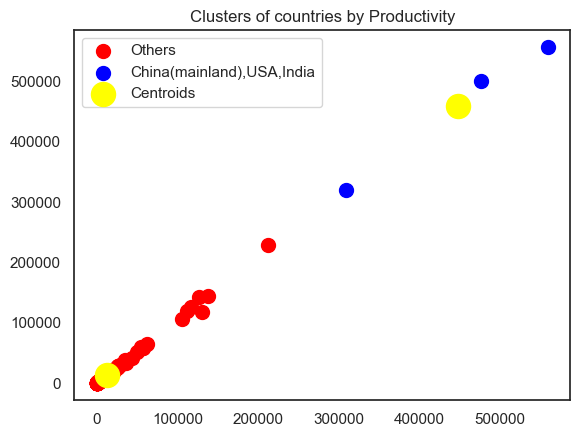

In [42]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='Others')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='China(mainland),USA,India')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of countries by Productivity')
plt.legend()
plt.show()

So, the blue cluster represents China(Mainland), USA and India while the red cluster represents all the other countries. China, USA and India stand out. 